In this notebook I analyze the computer performance (level 1, 3, 5, and 7) against humans. 

In [1]:
import numpy as np
import random as random
import scipy
#using simpleguitk for display, is not needed for computer game
import simpleguitk as simplegui
import time
#new ones
import pandas as pd
#ml methods
from xgboost import XGBRegressor
from xgboost import XGBClassifier
#logistic regression
from sklearn.linear_model import LogisticRegression
import os
#skyjo game classes and functions
from skyjo_functions4 import *
#own functions for machine learning
from ml_functions2 import *
#for plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#for confidence intervalls
from scipy.stats import beta
#for splitting
from sklearn.model_selection import train_test_split
#confusing matrix
from sklearn.metrics import confusion_matrix

First, I look on rounds the smallest unit in which a winner can be determined. 

In [2]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer1_0') or f.startswith('human_computer1_1')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files.sort()
#second computer implementation
list_input_files2=[f for f in os.listdir(myPath) 
    if f.startswith('human_computer3_0') and os.path.isfile(os.path.join(myPath, f))]
list_input_files2.sort()

In [3]:
res=np.zeros((7,len(list_input_files)))
deltahuman=0
deltacomputer=0
#list of results, currect ones need to 
listf=[]
for i in range(len(list_input_files)):
    file=np.loadtxt(list_input_files[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf.append(finfile)
    res[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res[5,i]=file[0,0]
    #last player
    res[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res[1:3,i]=file[49:51,0]
    else:
        res[1,i]=file[50,0]
        res[2,i]=file[49,0]
    if res[1,i]<res[2,i]:
        #human winner mark
        res[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman+=(res[2,i]-res[1,i])
    else:
        deltacomputer+=(res[1,i]-res[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res.T)        
#print number of elements in list
print(len(listf))

[[  1.  24.  46.   1.  30.   0.   1.]
 [  2.  36.   9.   0.  32.   0.   1.]
 [  3.  78.  24.   0.  31.   1.   1.]
 [  4.  11.  49.   1.  24.   0.   1.]
 [  5.   9.  22.   1.  26.   0.   1.]
 [  6.  13.  28.   1.  78.   1.   1.]
 [  7.   9.  19.   1.  41.   1.   1.]
 [  8.  10.  30.   1.  33.   1.   1.]
 [  9.  32.   8.   0.  31.   1.   1.]
 [ 10.  20.  24.   1.  41.   1.   1.]
 [ 11.  22.  34.   1.  34.   0.   1.]
 [ 12.  17.  41.   1.  34.   0.   1.]
 [ 13.  27.  29.   1.  27.   0.   1.]
 [ 14.  46.  15.   0.  31.   0.   1.]
 [ 15.  11.  23.   1.  32.   0.   1.]
 [ 16.  12.  36.   1.  24.   0.   1.]
 [ 17.  16.  22.   1.  35.   1.   1.]
 [ 18.  36.   4.   0.  36.   1.   1.]
 [ 19.  19.  28.   1.  24.   1.   1.]
 [ 20.  18.  32.   1.  36.   1.   1.]
 [ 21.  26.  13.   0.  36.   1.   1.]
 [ 22.  10.  55.   1.  27.   1.   1.]
 [ 23.  28.  41.   1.  36.   1.   1.]
 [ 24.  20.  65.   1.  24.   1.   1.]
 [ 25.  29.  39.   1.  26.   1.   1.]
 [ 26.  35.  45.   1.  28.   1.   1.]
 [ 27.  24. 

In [4]:
res2=np.zeros((7,len(list_input_files2)))
deltahuman2=0
deltacomputer2=0
#list of results, currect ones need to 
listf2=[]
for i in range(len(list_input_files2)):
    file=np.loadtxt(list_input_files2[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files2[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf2.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf2.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf2.append(finfile)
    res2[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res2[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res2[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res2[5,i]=file[0,0]
    #last player
    res2[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res2[1:3,i]=file[49:51,0]
    else:
        res2[1,i]=file[50,0]
        res2[2,i]=file[49,0]
    if res2[1,i]<res2[2,i]:
        #human winner mark
        res2[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman2+=(res2[2,i]-res2[1,i])
    else:
        deltacomputer2+=(res2[1,i]-res2[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res2.T)        
#print number of elements in list
print(len(listf2))

[[  1.  10.  41.   1.  28.   0.   1.]
 [  2.  28. 130.   1.  21.   0.   0.]
 [  3.  15.  16.   1.  28.   0.   1.]
 [  4.  18.  39.   1.  24.   0.   1.]
 [  5.  42.  28.   0.  27.   0.   0.]
 [  6.  20.  53.   1.  25.   1.   1.]
 [  7.  25.  37.   1.  24.   0.   1.]
 [  8.  21.  68.   1.  25.   1.   1.]
 [  9.  58. 150.   1.  22.   1.   0.]
 [ 10.  46.  32.   0.  22.   1.   0.]
 [ 11.  38.  55.   1.  25.   1.   1.]
 [ 12.  48.  35.   0.  24.   1.   0.]
 [ 13.  24.  39.   1.  28.   0.   1.]
 [ 14.  43. 126.   1.  21.   0.   0.]
 [ 15.  37. 124.   1.  24.   1.   0.]
 [ 16.  17. 132.   1.  26.   1.   0.]
 [ 17.  39.  96.   1.  21.   0.   0.]
 [ 18.  41.  96.   1.  20.   1.   0.]
 [ 19.  32.  76.   1.  23.   1.   1.]
 [ 20.  43. 120.   1.  20.   1.   0.]
 [ 21.  48. 134.   1.  21.   0.   0.]
 [ 22.  31.  32.   1.  38.   0.   1.]
 [ 23.  18.  39.   1.  29.   1.   1.]
 [ 24.  27.  98.   1.  25.   0.   0.]]
24


In [5]:
#convert lists of differnet lengths consistent of different arrays of same shape[0] but different shape[1]
def lists_arrays_to_one(listf,int2=True):
    #determine length of output
    c=0
    for i in range(len(listf)):
        c+=listf[i].shape[1]
        #create array
    ar=np.zeros((listf[0].shape[0],c))   
    c=0
    #now fill it
    for i in range(len(listf)):
        if int2==True:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        else:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        c+=listf[i].shape[1]
    return ar     

In [6]:
ar=lists_arrays_to_one(listf)
print(ar.shape)

(52, 3565)


In [7]:
print("with computer level 1")
print(f"the human won {int(sum(res[3]))} times of {res.shape[1]} rounds")

print(f"the human average is {round(np.mean(res[1]),3)} points")
                       
print(f"the computer average is {round(np.mean(res[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res[2]-res[1]),3)} points")
print(f"the human wins to {round(np.mean(res[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman/sum(res[3]),3)} points")
print(f"computer average adventage {round(deltacomputer/(res.shape[1]-sum(res[3])),3)} points")
print("with computer level 3")
print(f"the human won {int(sum(res2[3]))} times of {res2.shape[1]} rounds")
print(f"the human average is {round(np.mean(res2[1]),3)} points")
print(f"the computer average is {round(np.mean(res2[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res2[2]-res2[1]),3)} points")
print(f"the human wins to {round(np.mean(res2[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman2/sum(res2[3]),3)} points")
print(f"computer average adventage {round(deltacomputer2/(res2.shape[1]-sum(res2[3])),3)} points")

with computer level 1
the human won 89 times of 112 rounds
the human average is 27.562 points
the computer average is 35.268 points
the human average adventage is  7.705 points
the human wins to 79.5 %
human average adventage 18.427 points
computer average adventage 33.783 points
with computer level 3
the human won 21 times of 24 rounds
the human average is 32.042 points
the computer average is 74.833 points
the human average adventage is  42.792 points
the human wins to 87.5 %
human average adventage 50.857 points
computer average adventage 13.667 points


It seems that level 3 is not an improvement compared to level 1. 

In [8]:
#name of columns
columns=['acting_player']
columns.append('open_pile_card')
for i in range(15):
    columns.append('number_of_'+str(i-2)+'_in_open')
columns.append('number_of_cards_in_closed')
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card') 
columns.append('vanish_marker')
columns.append('turn')
columns.append('score_self')
columns.append('score_other')
columns.append('round_number')
print(len(columns),columns)
for i in range(43,52):
    print(i)
    print(columns[i],ar[i])

52 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [9]:
#create data frame 
df = pd.DataFrame(data = ar.T, index=range(ar.shape[1]),columns = columns)
print(df.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            0.0             4.0                   0.0                   0.0   
1            1.0             5.0                   0.0                   0.0   
2            0.0            -1.0                   0.0                   0.0   
3            1.0             8.0                   0.0                   0.0   
4            0.0             2.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  0.0               

Text(0, 0.5, 'human score-computer score [points]')

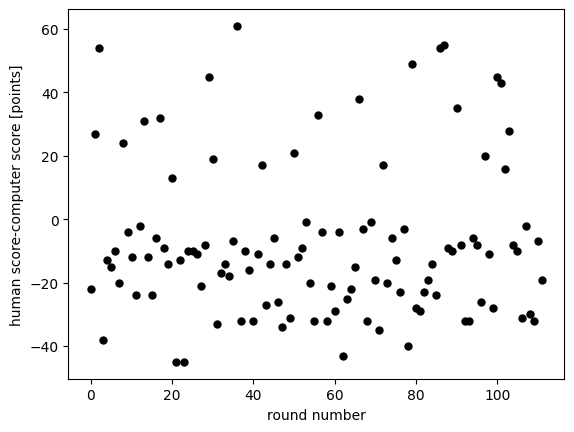

In [10]:
#slect only human
df2=df[df.acting_player==0].groupby(df.round_number).max()
plt.plot(df2.round_number,df2.score_self-df2.score_other,'o',ms=5,color='black') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("round number")
plt.ylabel("human score-computer score [points]")

In the results above it is visible that the human wins (or below 0) partly with only a small adventage while that never happends for then computer. That is because the computer finhss first, when the computer win he has no only the lowest number of points but also the points of the human are doubled causing that there is a gap just over zero. 

Text(0.5, 0, 'human score-computer score [points]')

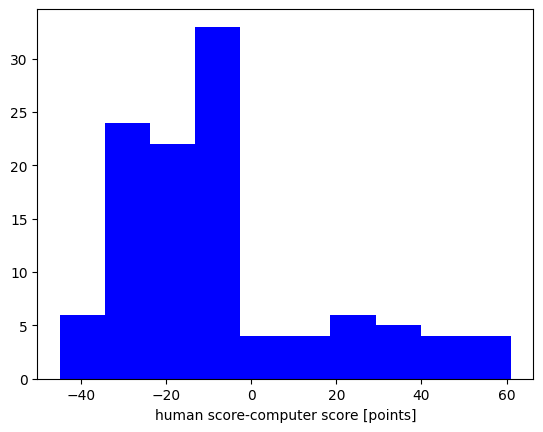

In [11]:
#df2.score_self.plot(kind='hist')
#df2.score_other.plot(kind='hist')
plt.hist(df2.score_self-df2.score_other,color='blue') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("number of occurancies")
plt.xlabel("human score-computer score [points]")

Now I look on full games in level 1, 3 and 5, 7. That is more important because since games is fianl unit of skyjo.

In [12]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files_l1=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer1_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l1.sort()
print(list_input_files_l1)

list_input_files_l3=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer3_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l3.sort()
print(list_input_files_l3)

list_input_files_l5=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer5_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l5.sort()
print(list_input_files_l5)

list_input_files_l7=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer7_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l7.sort()
print(list_input_files_l7)

['human_computer1_g001.txt', 'human_computer1_g002.txt', 'human_computer1_g003.txt', 'human_computer1_g004.txt', 'human_computer1_g005.txt', 'human_computer1_g006.txt', 'human_computer1_g007.txt', 'human_computer1_g008.txt', 'human_computer1_g009.txt', 'human_computer1_g010.txt', 'human_computer1_g011.txt', 'human_computer1_g012.txt', 'human_computer1_g013.txt', 'human_computer1_g014.txt', 'human_computer1_g015.txt', 'human_computer1_g016.txt', 'human_computer1_g017.txt', 'human_computer1_g018.txt', 'human_computer1_g019.txt', 'human_computer1_g020.txt', 'human_computer1_g021.txt', 'human_computer1_g022.txt', 'human_computer1_g023.txt', 'human_computer1_g024.txt', 'human_computer1_g025.txt', 'human_computer1_g026.txt', 'human_computer1_g027.txt', 'human_computer1_g028.txt', 'human_computer1_g029.txt', 'human_computer1_g030.txt', 'human_computer1_g031.txt', 'human_computer1_g032.txt', 'human_computer1_g033.txt']
['human_computer3_g001.txt', 'human_computer3_g002.txt', 'human_computer3_g

In [13]:
def get_game_stat(file_list,int2):
    resl1=np.zeros((7,len(file_list)))
    deltahuman=0
    deltacomputer=0
    #list of results, currect ones need to 
    for i in range(len(file_list)):
        finfile=np.loadtxt(file_list[i])   
        #get previous also to check that it is doe snot include also old input
        resl1[0,i]=i+1
        #number of turns 
        resl1[4,i]=finfile.shape[1]
        #number of rounds
        resl1[5,i]=finfile[51,finfile.shape[1]-1]+1
        #get scores of all games added together
        scores=np.zeros((2,int(resl1[5,i])))
        for j in range(finfile.shape[1]):
            if finfile[0,j]==0:
                scores[0:2,int(finfile[51,j])]=finfile[49:51,j]
            else:
                scores[0,int(finfile[51,j])]=finfile[50,j]
                scores[1,int(finfile[51,j])]=finfile[49,j]           
        #always player 0, human first 
        resl1[1,i]=sum(scores[0,:])
        resl1[2,i]=sum(scores[1,:])
                    
        if finfile[0,0]==0:
            #human winner mark
            resl1[3,i]=finfile[52,0]
        else:
            resl1[3,i]=finfile[53,0]
        resl1[6,:]=int2     
    return resl1       

In [14]:
resl1=get_game_stat(list_input_files_l1,1)
print("human against computer level 1")
print(f"the human won {int(sum(resl1[3]))} times of {resl1.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl1[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl1[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl1[2]-resl1[1]),3)} points")
print(f"the human wins to {round(np.mean(resl1[3]*100),1)} %")
print("")
resl3=get_game_stat(list_input_files_l3,3)
print("human against computer level 3")
print(f"the human won {int(sum(resl3[3]))} times of {resl3.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl3[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl3[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl3[2]-resl3[1]),3)} points")
print(f"the human wins to {round(np.mean(resl3[3]*100),1)} %")
print("")
resl5=get_game_stat(list_input_files_l5,5)
print("human against computer level 5")
print(f"the human won {int(sum(resl5[3]))} times of {resl5.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl5[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl5[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl5[2]-resl5[1]),3)} points")
print(f"the human wins to {round(np.mean(resl5[3]*100),1)} %")
print(" ")
resl7=get_game_stat(list_input_files_l7,7)
print("human against computer level 7")
print(f"the human won {int(sum(resl7[3]))} times of {resl7.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl7[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl7[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl7[2]-resl7[1]),3)} points")
print(f"the human wins to {round(np.mean(resl7[3]*100),1)} %")

human against computer level 1
the human won 25 times of 33 rounds
the human average is 82.242 points
the computer average is 111.758 points
the human average adventage is  29.515 points
the human wins to 75.8 %

human against computer level 3
the human won 21 times of 21 rounds
the human average is 54.81 points
the computer average is 150.381 points
the human average adventage is  95.571 points
the human wins to 100.0 %

human against computer level 5
the human won 43 times of 63 rounds
the human average is 93.317 points
the computer average is 110.159 points
the human average adventage is  16.841 points
the human wins to 68.3 %
 
human against computer level 7
the human won 20 times of 20 rounds
the human average is 59.85 points
the computer average is 130.25 points
the human average adventage is  70.4 points
the human wins to 100.0 %


Text(0, 0.5, 'computer score [points]')

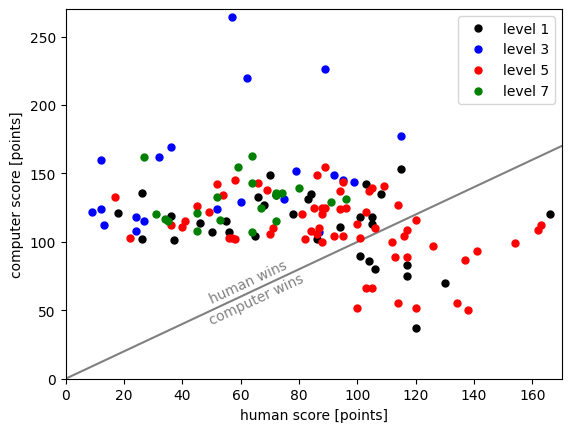

In [15]:
li=[0,300]
plt.plot(li,li,'-',ms=5,color='gray') 
plt.plot(resl1[1,:],resl1[2,:],'o',ms=5,color='black',label='level 1') 
plt.plot(resl3[1,:],resl3[2,:],'o',ms=5,color='blue',label='level 3') 
plt.plot(resl5[1,:],resl5[2,:],'o',ms=5,color='red',label='level 5') 
plt.plot(resl7[1,:],resl7[2,:],'o',ms=5,color='green',label='level 7') 
plt.text(50, 55, 'human wins', color='gray',rotation=25, rotation_mode='anchor')
plt.text(50, 40, 'computer wins', color='gray',rotation=25, rotation_mode='anchor')
plt.legend(loc="best")
plt.xscale("linear")
plt.xlim(0,170)
plt.ylim(0,270)
plt.xlabel("human score [points]")
plt.ylabel("computer score [points]")

Text(0, 0.5, 'computer-human score [points]')

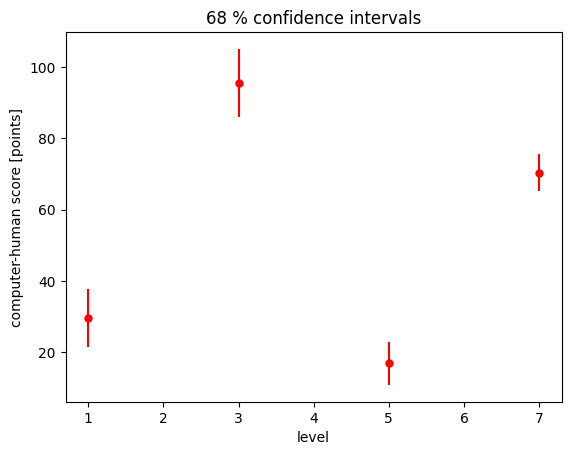

In [16]:
list_res=[resl1,resl3,resl5,resl7]
stat=np.zeros((6,len(list_res)))
for i in range(len(list_res)):
    stat[0,i]=list_res[i][6,0]
    stat[1,i]=np.mean(list_res[i][2,:]-list_res[i][1,:])
    stat[2,i]=np.std(list_res[i][2,:]-list_res[i][1,:])/np.sqrt(list_res[i].shape[1])
    stat[3,i]=np.mean(list_res[i][3]) 
    alpha=0.317
    k=int(np.sum(list_res[i][3]))
    n=list_res[i].shape[1]
    p_u, p_o = beta.ppf([alpha/2, 1 - alpha/2], [k, k + 1], [n - k + 1, n - k])
    stat[4,i]=p_u
    stat[5,i]=p_o
    if np.isnan(stat[5,i]):
        stat[5,i]=1
lower_error =  stat[3]-stat[4,:]
upper_error =  stat[5,:]-stat[3]
asymmetric_error = np.array([lower_error,upper_error])
plt.errorbar(stat[0,:],stat[1,:], yerr=stat[2,:],ms=5, fmt='o',color='red')
plt.xscale("linear")
plt.xlabel("level")
plt.title("68 % confidence intervals")
plt.ylabel("computer-human score [points]")

Text(0, 0.5, '% human wins')

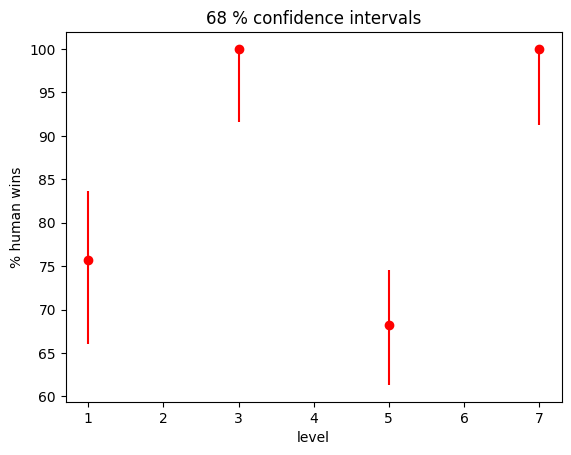

In [17]:
plt.errorbar(stat[0,:],100*stat[3,:], yerr=asymmetric_error*100, fmt='o', color = 'red')   
plt.xscale("linear")
plt.xlabel("level")
plt.title("68 % confidence intervals")
plt.ylabel("% human wins")

The computer in level 3 and 7 performs worse, the computer never wins there and the average points are also similar. The computer is better in level 1 and 5, it wins about 1/4, enough that the game makes fun. 
There is no improvement of level 5 to 1 visisble. There still could be a small improvement, the errorbars overlap. However it can only be so small that it is an interesting improvement, which would be equal changes for human and computer. 

Below I check how good the models are to predict points in the rounds against humans. 

In [18]:
#columns used in model 
level1_2players_columns=np.loadtxt("xgb_model1_column2.txt")
#the score columns need to be marked back 
sel1=np.copy(level1_2players_columns)
#the score columns set to 1 since need to be output
sel1[49:51]=1

#model file needed to run (is in included in function library not needed here but is so more visible) 
level1_2players_model = XGBRegressor()
level1_2players_model.load_model("xgb_model2.json")
level1_2players_modelb = XGBRegressor()
level1_2players_modelb.load_model("xgb_model3.json")
level1_2players_modelc = XGBRegressor()
level1_2players_modelc.load_model("xgb_model4.json")
print(len(level1_2players_columns),sum(level1_2players_columns))
#get prediction
for_xgb=np.zeros((int(sum(level1_2players_columns)),df.shape[0]))
counter=0
for i in range(len(level1_2players_columns)):
    if level1_2players_columns[i]==1:
        for_xgb[counter]=df.iloc[:,i]
        counter+=1
print(counter)   
print(for_xgb.shape)
print(for_xgb)

51 30.0
30
(30, 3565)
[[ 4.  5. -1. ...  7.  6. 11.]
 [20. -1. 20. ... 20. -1. 20.]
 [20. 20. 20. ... 20.  2. 20.]
 ...
 [30.  2. 30. ... 12. 11.  6.]
 [ 4.  0.  7. ...  4. 11.  4.]
 [ 5. -1.  8. ...  6. 20. 12.]]


In [19]:
res=level1_2players_model.predict(for_xgb.T)
resb=level1_2players_modelb.predict(for_xgb.T)

Text(0.5, 1.0, 'xgboost fitted to random acting computer')

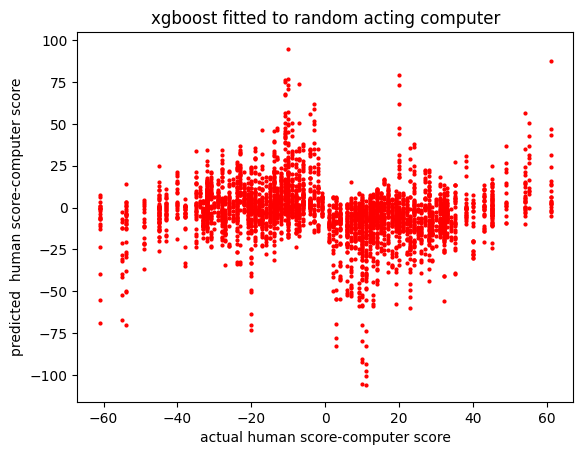

In [20]:
plt.plot( df.score_self-df.score_other,res,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to random acting computer")

Text(0.5, 1.0, 'xgboost fitted to improved acting computer')

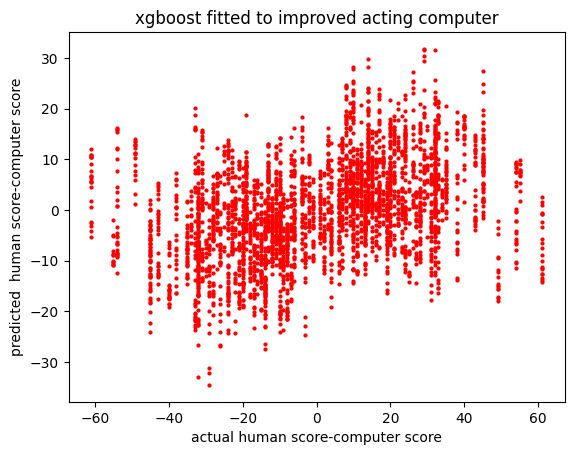

In [21]:
plt.plot( df.score_self-df.score_other,resb,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to improved acting computer")

The model fitted to the improbved acting computer looks clearly better, there is a positivecorrelation visible while there is nothing or a negative correlation visible for the other. 

In [22]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781


The prediction is rather bad for the xgboost model fitted to the random data, when subtracting it from the score increase the standard deviation instead to decrease it as when it worked as it is the case on computer data. The median deviation looks better, there the deviation reduces slightly, thus just a few cases are really badly predicted. 

The similar xgbmodel fitted to improved computer actions fairs better, it reduces most measures of performances

Other ideas use both xgb (more feature engeering on it, change to vanished card n explict feature, likely small N cause a problem) for the next iteration. deep learning only if it is better on the training data.

If that does not decrease predictions, then train on human data, more simple model needed, maybe xgb or linear with good features. 

In [23]:
df['own_n_closed']=df.loc[:,'own_cards_0':'own_cards_11'][df.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df['own_n_open']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=30) & (df.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df['own_max']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df['own_sum']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df['other_player_n_closed']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][df.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df['other_player_n_open']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)
df['other_player_max']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df['other_player_sum']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)


In [24]:
#feature negering to better columns
newcolumns=['open_pile_card', 'own_n_closed', 'own_n_open', 'own_max',
       'own_sum', 'other_player_n_closed', 'other_player_n_open',
       'other_player_max', 'other_player_sum', 'action_take_open', 'action_discard',
       'discard_value','numeric_player_card', 'score_self',
       'score_other', 'round_number']
df2=df.loc[:,newcolumns]
#excloding target columns and round
df3=df.loc[:,newcolumns[0:13]]

In [25]:
resc=level1_2players_modelc.predict(df3)

Text(0.5, 1.0, 'xgboost on feature engering fitted to improved acting computer')

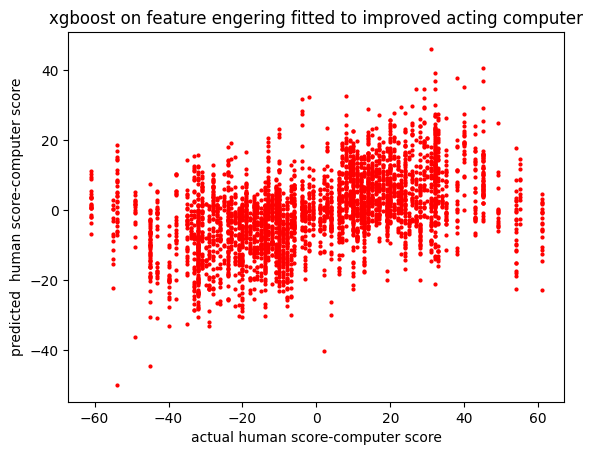

In [26]:
plt.plot( df.score_self-df.score_other,resc,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost on feature engering fitted to improved acting computer")

In [27]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")
print("Model 3")
print(f"standard deviation data-model {np.round(np.std(resc-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resc-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781
Model 3
standard deviation data-model 22.224
median deviation data 16.108


The two xgboost models based on the same data perform somewhat similar, the one using the data directly has a smaller median deviation, the other a smaller deviation deviation. 

In [28]:
feature_train2,feature_test2, target_train2,target_test2=split_test(df2.iloc[:,0:13],df2.score_self-df2.score_other, df2.iloc[:,15],0.6)

2139
2148


In [29]:
ar=do_xgb(feature_train2, target_train2, feature_test2, target_test2,6,reg=0)
print(ar)

xgb took 0.1428 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 27.4042 points
standard deviation of prediction-train 5.689 points
[ 0.          6.          5.68904372 27.40418715]


In [30]:
loop_reg(feature_train2, target_train2, feature_test2, target_test2,4,1,1.414,25,"xgb_human1_maxd04.txt")

doing case 0
xgb took 0.1122 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.7528 points
standard deviation of prediction-train 13.7311 points
doing case 1
xgb took 0.0512 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.8047 points
standard deviation of prediction-train 13.9161 points
doing case 2
xgb took 0.0685 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 26.0911 points
standard deviation of prediction-train 13.7356 points
doing case 3
xgb took 0.0502 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.9185 points
standard deviation of prediction-train 13.9202 points
doing case 4
xgb took 0.0504 seconds
standard deviation of test 25.9178 points
s

In [31]:
hum1=np.loadtxt("xgb_human1_maxd01.txt")
hum2=np.loadtxt("xgb_human1_maxd02.txt")
hum3=np.loadtxt("xgb_human1_maxd03.txt")
hum4=np.loadtxt("xgb_human1_maxd04.txt")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum1[3]),4)} of max-depth=1")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum2[3]),4)} of max-depth=2")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum3[3]),4)} of max-depth=3")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum4[3]),4)} of max-depth=4")

minimum standard deviation of (prediction-test data) 23.4487 of max-depth=1
minimum standard deviation of (prediction-test data) 23.4124 of max-depth=2
minimum standard deviation of (prediction-test data) 23.5616 of max-depth=3
minimum standard deviation of (prediction-test data) 23.7237 of max-depth=4


Text(0, 0.5, 'standard deviation of data-prediction [points]')

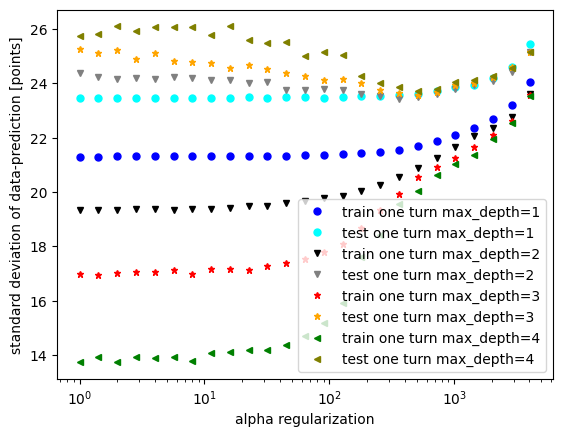

In [32]:
plt.plot(hum1[0],hum1[2],'o',ms=5,color='blue',label='train one turn max_depth=1') 
plt.plot(hum1[0],hum1[3],'o',ms=5,color='cyan',label='test one turn max_depth=1')
plt.plot(hum2[0],hum2[2],'v',ms=5,color='black',label='train one turn max_depth=2') 
plt.plot(hum2[0],hum2[3],'v',ms=5,color='gray',label='test one turn max_depth=2')
plt.plot(hum3[0],hum3[2],'*',ms=5,color='red',label='train one turn max_depth=3') 
plt.plot(hum3[0],hum3[3],'*',ms=5,color='orange',label='test one turn max_depth=3')
plt.plot(hum4[0],hum4[2],'<',ms=5,color='green',label='train one turn max_depth=4') 
plt.plot(hum4[0],hum4[3],'<',ms=5,color='olive',label='test one turn max_depth=4')
plt.legend(loc="best")
plt.xscale("log")
#plt.ylim(55,65)
plt.xlabel("alpha regularization")
plt.ylabel("standard deviation of data-prediction [points]")

Taring an xgboost model on the human is worse in the prediction than both models trained on advanced computer settings. 

I could explore more complicated models but could also first implement the otehr xgbbosst, espeically the one
without feature engering needs just a different input file as name. 

In [33]:
#check how model in actual application fares
#linear regression on each action option separately?  a lot of work and seem not machine learning
print(df2)
dftake=df2[df2.action_take_open==1]

      open_pile_card  own_n_closed  own_n_open  own_max  own_sum  \
0                4.0            10           2      8.0     13.0   
1                5.0            10           2      1.0      0.0   
2               -1.0            10           2      8.0     12.0   
3                8.0            10           2      2.0      3.0   
4                2.0            10           2      4.0      3.0   
...              ...           ...         ...      ...      ...   
3560            10.0             2          10     12.0     28.0   
3561            12.0             1          11      8.0     41.0   
3562             7.0             2          10      6.0     22.0   
3563             6.0             1           8      8.0     24.0   
3564            11.0             2          10     12.0     28.0   

      other_player_n_closed  other_player_n_open  other_player_max  \
0                        10                    2               1.0   
1                        10                

In [34]:
print(level1_2players_model.feature_importances_.shape,df.shape)
print(level1_2players_modelb.feature_importances_)

(30,) (3565, 60)
[0.20022598 0.00963422 0.11840304 0.00660788 0.01313902 0.0138765
 0.00815738 0.0077707  0.00912716 0.00465302 0.013208   0.03226249
 0.01348601 0.01038121 0.12892811 0.01242334 0.00744092 0.01283619
 0.00913652 0.00782426 0.0077482  0.00451147 0.01120893 0.02889716
 0.01112024 0.153542   0.00087686 0.00638651 0.12962395 0.00656274]


In [35]:
columns=['open_pile_card']
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card')              
print(columns)
print(len(columns))

['open_pile_card', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card']
30


fitting random data
open_pile_card has importance 0.0117
action_take_open has importance 0.0658
discard_value has importance 0.0133
id_player_card has importance 0.0079
fitting level 1 data
open_pile_card has importance 0.2002
own_cards_1 has importance 0.1184
own_cards_10 has importance 0.0323
other_player_cards_1 has importance 0.1289
other_player_cards_10 has importance 0.0289
action_take_open has importance 0.1535
id_player_card has importance 0.1296


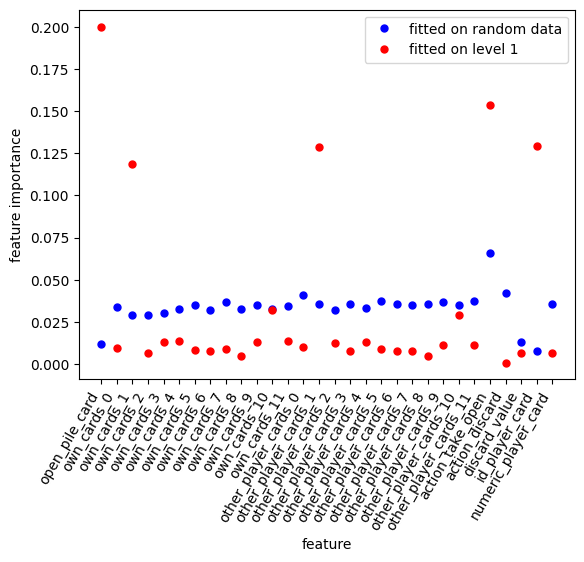

In [36]:
plt.plot(columns[0:30],level1_2players_model.feature_importances_,'o',ms=5,color='blue',label='fitted on random data') 
plt.plot(columns[0:30],level1_2players_modelb.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=60, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting random data")
for i in range(30):
    if abs(level1_2players_model.feature_importances_[i]-np.median(level1_2players_model.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_model.feature_importances_[i],4)))
 
print("fitting level 1 data")
for i in range(30):
    if abs(level1_2players_modelb.feature_importances_[i]-np.median(level1_2players_modelb.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_modelb.feature_importances_[i],4)))
    

In the first fit which is done on the random data the vast majority features has about the same importance. 
Less importance has the open card, the value of the discarded card and least the id of the choosen card. The only feature with larger importance is the whether the open card is used. 
That seems plausible, most are equally importance, the id is truly less imprortant usually and whether the open card has a lot of importance on the following actions.

In contrast a lot is different for the model fitted to level 1 (which has less depth and fits more correlated data), most have nearlz no importance. Take action stazs important but beides also not so plasuible also 4 player cards (that both player contribute the same can be understood since who is who changes from turn to turn) and the id of used card. That the value of the open is used is plausible, since it matters at least closer to the end of the game. 
Still overall it makes less sense, and thus it is not surprising that implementing it does not lead to improvements. 

fitting level 1 data with features
open_pile_card has importance 0.0178
own_n_closed has importance 0.2736
own_n_open has importance 0.0091
own_sum has importance 0.1182
other_player_n_closed has importance 0.2667
other_player_n_open has importance 0.0131
other_player_sum has importance 0.1163
action_take_open has importance 0.0199
action_discard has importance 0.0141
numeric_player_card has importance 0.0582


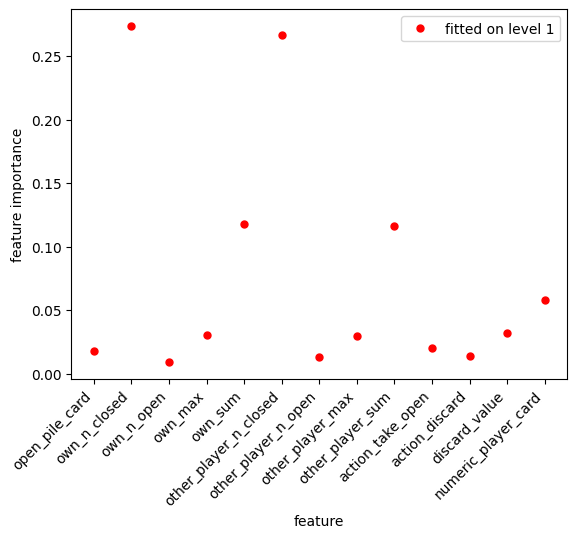

In [37]:
plt.plot(newcolumns[0:13],level1_2players_modelc.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=45, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting level 1 data with features")
for i in range(13):
    if abs(level1_2players_modelc.feature_importances_[i]-np.median(level1_2players_modelc.feature_importances_))>0.01:
        print(newcolumns[i]+" has importance "+str(round(level1_2players_modelc.feature_importances_[i],4)))
    

Here it looks more plausibel again. Most important are the sum of the card values and how many or open, since the the differential score is approximate: own_sum+own_n_closed*avg_value-(other_player_sum+other_player_n_closed*avg_value)

The next important is the player card given, which is the next important, because it always matters.

That n_open has the smallest importance makes sense since it is just reverse of closed always besides for vanishing cards, and it is not expected that those importance can be discovered here.  

Reason for no improvement could be that the system fits too much the past xgboost model which helps for predicting future
but possible not for winning. Using first level data which is more random in a better moredl could help agaoinst that. 


New Idea

Human imitation. Now predicting which card was used. First for all human actions. Later possible restricting to won games, could add other wins to it.

Both rounds and games are used. 

In [39]:
list_all=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer')) and os.path.isfile(os.path.join(myPath, f))]
#randomness wanted that test train have random subsets of it since splitting is not random 
random.shuffle(list_all)
print(list_all)
print(len(list_all))

['human_computer3_019.txt', 'human_computer5_g048.txt', 'human_computer5_g053.txt', 'human_computer5_g014.txt', 'human_computer1_008.txt', 'human_computer5_g056.txt', 'human_computer5_g042.txt', 'human_computer1_001.txt', 'human_computer5_g013.txt', 'human_computer1_042.txt', 'human_computer1_g020.txt', 'human_computer3_g001.txt', 'human_computer5_g012.txt', 'human_computer1_g015.txt', 'human_computer1_110.txt', 'human_computer3_g008.txt', 'human_computer3_g020.txt', 'human_computer3_016.txt', 'human_computer1_g014.txt', 'human_computer1_003.txt', 'human_computer5_g036.txt', 'human_computer1_031.txt', 'human_computer3_010.txt', 'human_computer1_047.txt', 'human_computer1_056.txt', 'human_computer1_088.txt', 'human_computer7_g020.txt', 'human_computer3_g019.txt', 'human_computer1_101.txt', 'human_computer1_073.txt', 'human_computer1_102.txt', 'human_computer1_g027.txt', 'human_computer1_026.txt', 'human_computer1_g023.txt', 'human_computer1_074.txt', 'human_computer5_g061.txt', 'human_c

In [40]:
#get all columns for now, add also win worker
#first get number of rows 
cc=0
for i in range(len(list_all)):
    a=np.loadtxt(list_all[i])
    cc+=a.shape[1]
print(cc)  
all_hu_com=np.zeros((55,int(cc)))
#55 is number of data entry
cc=0
for i in range(len(list_all)):
    a=np.loadtxt(list_all[i])    
    #rounds
    if a.shape[0]==51:
        all_hu_com[0:51,cc:cc+a.shape[1]]=a
        #rounds
        all_hu_com[51,cc:cc+a.shape[1]]=0
        #not fats but not big here
        for j in range(a.shape[1]):
            if a[49,j]<a[50,j]:
                all_hu_com[52,cc+j]=1
            else:
                all_hu_com[53,cc+j]=1
    else:            
         all_hu_com[0:54,cc:cc+a.shape[1]]=a   
    all_hu_com[54,cc:cc+a.shape[1]]=i        
    cc+=a.shape[1]     
    

19928


In [41]:
#column names 
columns2=['acting_player']
columns2.append('open_pile_card')
for i in range(15):
    columns2.append('number_of_'+str(i-2)+'_in_open')
columns2.append('number_of_cards_in_closed')
for i in range(12):
    columns2.append('own_cards_'+str(i))
for i in range(12):
    columns2.append('other_player_cards_'+str(i))    
columns2.append('action_take_open')
columns2.append('action_discard')
columns2.append('discard_value')
columns2.append('id_player_card')
columns2.append('numeric_player_card') 
columns2.append('vanish_marker')
columns2.append('turn')
columns2.append('score_self')
columns2.append('score_other')
columns2.append('round_number')
columns2.append('winner_self')
columns2.append('winner_other')
columns2.append('entry_number')
print(len(columns2),columns2)

55 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [42]:
df_hum_com = pd.DataFrame(data = all_hu_com.T, index=range(all_hu_com.shape[1]),columns = columns2)
print(df_hum_com.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            1.0             4.0                   0.0                   0.0   
1            0.0             7.0                   0.0                   0.0   
2            1.0            10.0                   0.0                   0.0   
3            0.0             4.0                   0.0                   0.0   
4            1.0             1.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  0.0                  1.0                  1.0   
1                  0.0                  1.0                  1.0   
2                  0.0                  1.0                  1.0   
3                  0.0                  1.0                  1.0   
4                  0.0                  1.0                  1.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  0.0               

Select human, human who wins and all winners now.

In [43]:
#select human is first player
df_hum=df_hum_com[df_hum_com.acting_player==0]
#human wins
df_hum_win=df_hum_com[(df_hum_com.acting_player==0) & (df_hum_com.winner_self==1)]
#all wins
df_win=df_hum_com[ (df_hum_com.winner_self==1)]
print(df_hum.shape,df_hum_win.shape,df_win.shape)


(9776, 55) (7825, 55) (9844, 55)


Now I get some sumarizing columns for the player cards, since it is clear that for using single card information
there were not enough games. 

In [44]:
#get average value of cards
weight_vec=np.array([5/150,10/150,15/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150]) 
vals=np.array(range(-2,13))

av_value=np.dot(vals,weight_vec)
#average vale of card
print(f"average value is {av_value}")
df_hum['own_n_closed']=df_hum.loc[:,'own_cards_0':'own_cards_11'][df_hum.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df_hum['own_n_open']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_hum['own_sum']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_hum['own_max']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_hum['other_player_n_closed']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_hum['other_player_n_open']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_hum['other_player_sum']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_hum['other_player_max']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
#replace placeholder with for closed with avg_value
df_hum['value_player_card']=df_hum['numeric_player_card']
df_hum.value_player_card[df_hum.numeric_player_card==20]=av_value

#now same for human wins
df_hum_win['own_n_closed']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][df_hum_win.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
df_hum_win['own_n_open']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_hum_win['own_sum']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_hum_win['own_max']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_hum_win['other_player_n_closed']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_hum_win['other_player_n_open']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_hum_win['other_player_sum']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_hum_win['other_player_max']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df_hum_win['value_player_card']=df_hum_win['numeric_player_card']
df_hum_win.value_player_card[df_hum_win.numeric_player_card==20]=av_value


#now same for wins
df_win['own_n_closed']=df_win.loc[:,'own_cards_0':'own_cards_11'][df_win.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
df_win['own_n_open']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_win['own_sum']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_win['own_max']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_win['other_player_n_closed']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][df_win.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_win['other_player_n_open']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_win['other_player_sum']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_win['other_player_max']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df_win['value_player_card']=df_win['numeric_player_card']
df_win.value_player_card[df_win.numeric_player_card==20]=av_value

#now selecting no take_open to train on discard action 
df_hum_discard=df_hum[df_hum.action_take_open==0]
df_win_discard=df_win[df_win.action_take_open==0]
df_hum_win_discard=df_hum_win[df_hum_win.action_take_open==0]

#now selecting not closed discrad actions 
df_hum_value=df_hum[df_hum.action_discard==0]
df_win_value=df_win[df_win.action_discard==0]
df_hum_win_value=df_hum_win[df_hum_win.action_discard==0]

average value is 5.066666666666666


Now I am looking on correlations. 

In [45]:
#s1 corr(s2, method='pearson')
corrs=df_hum.corr('pearson')
#now only wins 
corrs_hum_win=df_hum_win.corr('pearson')
corrs_win=df_win.corr('pearson')
#only using discard actions
corrs_discard=df_hum_discard.corr('pearson')
#now only wins 
corrs_hum_win_discard=df_hum_win_discard.corr('pearson')
corrs_win_discard=df_win_discard.corr('pearson')
#only using not needing to take closed actions
corrs_value=df_hum_value.corr('pearson')
#now only wins 
corrs_hum_win_value=df_hum_win_value.corr('pearson')
corrs_win_value=df_win_value.corr('pearson')

open_pile_card
 human  has correlation of -0.726
 human wins has correlation of -0.7353
 wins has correlation of -0.7374
own_cards_0
 human  has correlation of 0.0932
 human wins has correlation of 0.102
 wins has correlation of 0.0857
action_discard
 human  has correlation of -0.4906
 human wins has correlation of -0.4913
 wins has correlation of -0.4512
discard_value
 human  has correlation of 0.9561
 human wins has correlation of 0.9572
 wins has correlation of 0.9539
numeric_player_card
 human  has correlation of -0.166
 human wins has correlation of -0.1575
 wins has correlation of -0.1396
vanish_marker
 human  has correlation of 0.1113
 human wins has correlation of 0.1062
 wins has correlation of 0.1014
other_player_sum
 human  has correlation of -0.0071
 human wins has correlation of -0.0781
 wins has correlation of -0.1174
other_player_max
 human  has correlation of -0.1362
 human wins has correlation of -0.1205
 wins has correlation of -0.1514


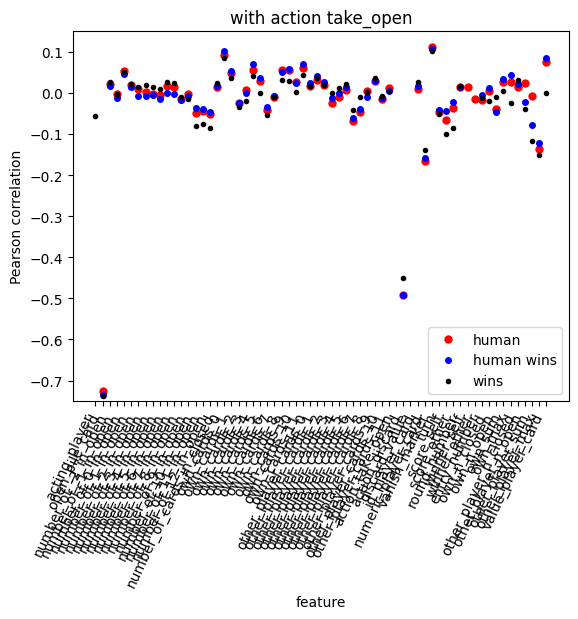

In [46]:
plt.plot(df_hum.columns,corrs.action_take_open,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win.action_take_open,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win.action_take_open,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.75,0.15)
plt.xticks(rotation=65, ha='right')
plt.title("with action take_open")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs.action_take_open[i]<1 and  (abs(corrs.action_take_open[i])>0.10 or abs(corrs_hum_win.action_take_open[i])>0.10 or  abs(corrs_win.action_take_open[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs.action_take_open[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win.action_take_open[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win.action_take_open[i],4)}")     

Some of the action happen only after take_action is decided like discard, x_player_card, score_x thus they should be ignored. Also vanish_marker cannot be just used because it happens only after it. However, the possibility of it could (and likely should be when just one exchange is missing) be predicted.

The strongest correlation is with the open card value as expected. All others are clearly less important, the next important is other_player_max

Now looking on discard action , thewre only cases the open pile card is not uswd are considered.

discard_value
 human  has correlation of 0.7154
 human wins has correlation of 0.7384
 wins has correlation of 0.6309
numeric_player_card
 human  has correlation of 0.5877
 human wins has correlation of 0.5682
 wins has correlation of 0.6203
vanish_marker
 human  has correlation of -0.1412
 human wins has correlation of -0.147
 wins has correlation of -0.1162
score_self
 human  has correlation of 0.1247
 human wins has correlation of 0.1306
 wins has correlation of 0.0277
own_max
 human  has correlation of -0.1188
 human wins has correlation of -0.1209
 wins has correlation of -0.1825
value_player_card
 human  has correlation of -0.3328
 human wins has correlation of -0.3044
 wins has correlation of -0.3513


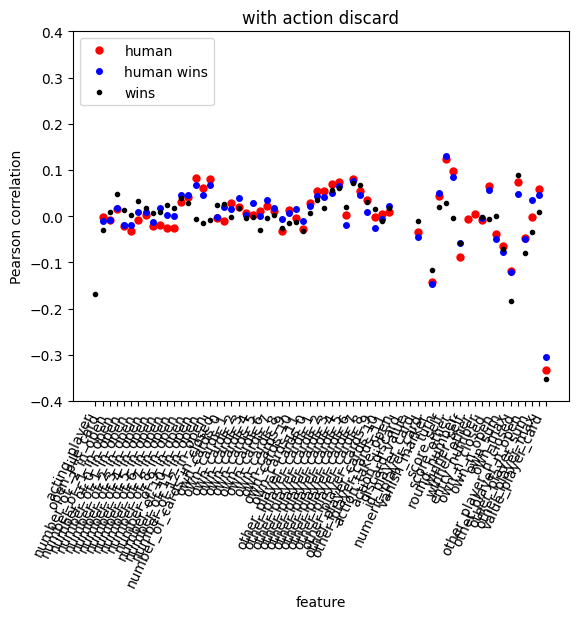

In [47]:
plt.plot(df_hum.columns,corrs_discard.action_discard,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win_discard.action_discard,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win_discard.action_discard,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.4,0.4)
plt.xticks(rotation=65, ha='right')
plt.title("with action discard")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_discard.action_discard[i]<1 and  (abs(corrs_discard.action_discard[i])>0.10 or abs(corrs_hum_win_discard.action_discard[i])>0.10 or  abs(corrs_win_discard.action_discard[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_discard.action_discard[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_discard.action_discard[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_discard.action_discard[i],4)}")     

The x_player card is happening afterwards in a turn. As expected dicard value has the strongest correlation since it depends from that value which action is the best. 

Below then the corrdlelation with played card ignoring the cases when a closed one needed to be taken. In two variants, first closed card are 20, then they are 5.07 which they are in average. 

open_pile_card
 human  has correlation of 0.1797
 human wins has correlation of 0.1397
 wins has correlation of 0.206
number_of_3_in_open
 human  has correlation of -0.1088
 human wins has correlation of -0.086
 wins has correlation of -0.1254
number_of_4_in_open
 human  has correlation of -0.1214
 human wins has correlation of -0.1101
 wins has correlation of -0.14
number_of_5_in_open
 human  has correlation of -0.0856
 human wins has correlation of -0.0712
 wins has correlation of -0.1003
number_of_10_in_open
 human  has correlation of 0.1289
 human wins has correlation of 0.0773
 wins has correlation of 0.1891
number_of_11_in_open
 human  has correlation of 0.1231
 human wins has correlation of 0.0756
 wins has correlation of 0.1726
number_of_12_in_open
 human  has correlation of 0.1271
 human wins has correlation of 0.0769
 wins has correlation of 0.1835
own_cards_2
 human  has correlation of 0.1043
 human wins has correlation of 0.0962
 wins has correlation of 0.1167
own_cards_6
 

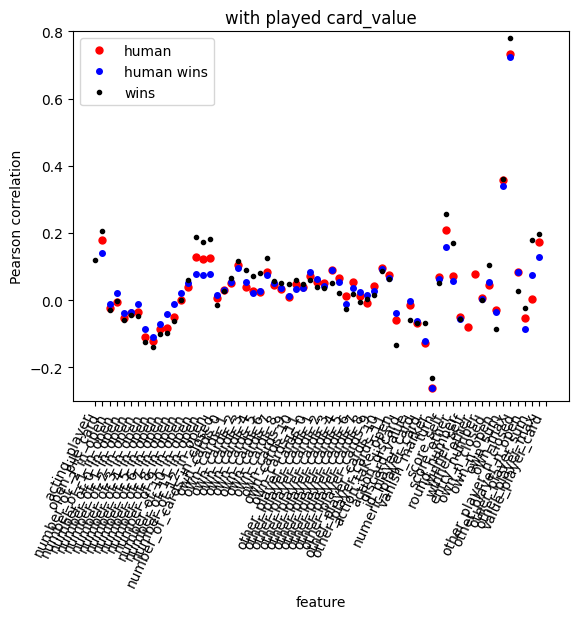

In [48]:
plt.plot(df_hum.columns,corrs_value.value_player_card,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win_value.value_player_card,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win_value.value_player_card,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.3,0.8)
plt.xticks(rotation=65, ha='right')
plt.title("with played card_value")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_value.value_player_card[i]<1 and  (abs(corrs_value.value_player_card[i])>0.10 or abs(corrs_hum_win_value.value_player_card[i])>0.10 or  abs(corrs_win_value.value_player_card[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_value.value_player_card[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_value.value_player_card[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_value.value_player_card[i],4)}")   

open_pile_card
 human  has correlation of -0.1167
 human wins has correlation of -0.1137
 wins has correlation of -0.1313
number_of_0_in_open
 human  has correlation of 0.0921
 human wins has correlation of 0.0945
 wins has correlation of 0.1025
number_of_8_in_open
 human  has correlation of -0.1052
 human wins has correlation of -0.0969
 wins has correlation of -0.0908
number_of_10_in_open
 human  has correlation of -0.1442
 human wins has correlation of -0.1207
 wins has correlation of -0.1361
number_of_11_in_open
 human  has correlation of -0.1421
 human wins has correlation of -0.121
 wins has correlation of -0.1387
number_of_12_in_open
 human  has correlation of -0.1771
 human wins has correlation of -0.1689
 wins has correlation of -0.1704
number_of_cards_in_closed
 human  has correlation of 0.1019
 human wins has correlation of 0.0888
 wins has correlation of 0.1028
own_cards_0
 human  has correlation of 0.1408
 human wins has correlation of 0.1685
 wins has correlation of 0.126

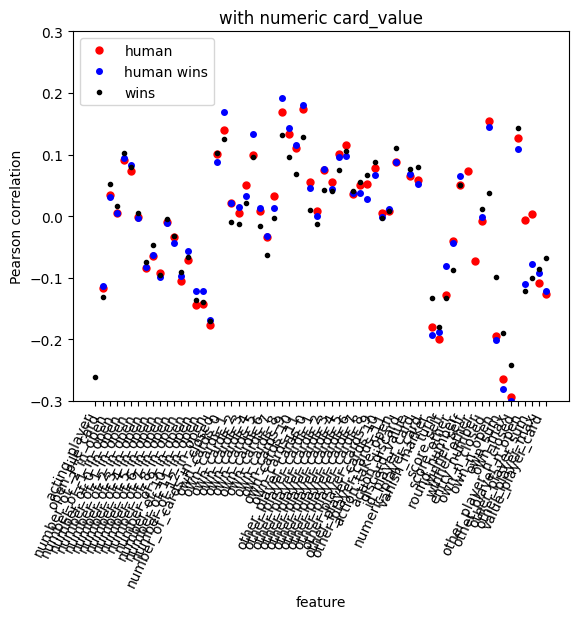

In [49]:
plt.plot(df_hum_value.columns,corrs_value.numeric_player_card,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win_value.columns,corrs_hum_win_value.numeric_player_card,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win_value.columns,corrs_win_value.numeric_player_card,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.3,0.3)
plt.xticks(rotation=65, ha='right')
plt.title("with numeric card_value")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_value.numeric_player_card[i]<1 and  (abs(corrs_value.numeric_player_card[i])>0.10 or abs(corrs_hum_win_value.numeric_player_card[i])>0.10 or  abs(corrs_win_value.numeric_player_card[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_value.numeric_player_card[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_value.numeric_player_card[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_value.numeric_player_card[i],4)}")  

Both are similar, likely value is better, since there are at most very small effects when the card is closed when taking it. 

Again the most connectedness ones the action parts before and some not knowable are important, but the player card summarizing
numbers are also more important now, especiually teh maximum value of the own card set. 

Selecting some features which matter more likely for trying xgboost first for take_open.

In [52]:
print(df_hum.columns)
col_sel1=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','action_take_open','entry_number']
df_hum_sel=df_hum.loc[:,col_sel1]
df_hum_win_sel=df_hum_win.loc[:,col_sel1]
df_win_sel=df_win.loc[:,col_sel1]
#selection for discard
col_sel2=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','discard_value','action_discard','entry_number']
df_hum_sel_discard=df_hum_discard.loc[:,col_sel2]
df_hum_win_sel_discard=df_hum_win_discard.loc[:,col_sel2]
df_win_sel_discard=df_win_discard.loc[:,col_sel2]
#start next is selecting the ones for card value, include action_open (but not other) because only one of
#discard is possible 
#target is value_card and it is regression since it are points 
col_sel3=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','action_take_open','discard_value','value_player_card','entry_number']
print(len(col_sel3))
df_hum_sel_value=df_hum_value.loc[:,col_sel3]
df_hum_win_sel_value=df_hum_win_value.loc[:,col_sel3]
df_win_sel_value=df_win_value.loc[:,col_sel3]

Index(['acting_player', 'open_pile_card', 'number_of_-2_in_open',
       'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open',
       'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open',
       'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open',
       'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open',
       'number_of_11_in_open', 'number_of_12_in_open',
       'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1',
       'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5',
       'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9',
       'own_cards_10', 'own_cards_11', 'other_player_cards_0',
       'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3',
       'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6',
       'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9',
       'other_player_cards_10', 'other_player_cards_11', 'action_take_ope

In [53]:
#now splitting
df_hum_train,df_hum_test= train_test_split(df_hum_sel,train_size=0.60, shuffle=True, random_state=1)
df_hum_win_train,df_hum_win_test= train_test_split(df_hum_win_sel,train_size=0.60, shuffle=True, random_state=1)
df_win_train,df_win_test= train_test_split(df_win_sel,train_size=0.60, shuffle=True, random_state=1)
print(df_hum_win_train.shape)
#better splitting of games/round each is only in one sample, they are more similar than random results 
df_win_feature_train2,df_win_feature_test2,df_win_target_train2,df_win_target_test2=split_test(df_win_sel.iloc[:,0:9],df_win_sel.iloc[:,9], df_win_sel.iloc[:,10],0.6)
df_hum_feature_train2,df_hum_feature_test2,df_hum_target_train2,df_hum_target_test2=split_test(df_hum_sel.iloc[:,0:9],df_hum_sel.iloc[:,9], df_hum_sel.iloc[:,10],0.6)
df_hum_win_feature_train2,df_hum_win_feature_test2,df_hum_win_target_train2,df_hum_win_target_test2=split_test(df_hum_win_sel.iloc[:,0:9],df_hum_win_sel.iloc[:,9], df_hum_win_sel.iloc[:,10],0.6)
#now for discard 
df_win_feature_train2_discard,df_win_feature_test2_discard,df_win_target_train2_discard,df_win_target_test2_discard=split_test(df_win_sel_discard.iloc[:,0:10],df_win_sel_discard.iloc[:,10], df_win_sel_discard.iloc[:,11],0.6)
df_hum_feature_train2_discard,df_hum_feature_test2_discard,df_hum_target_train2_discard,df_hum_target_test2_discard=split_test(df_hum_sel_discard.iloc[:,0:10],df_hum_sel_discard.iloc[:,10], df_hum_sel_discard.iloc[:,11],0.6)
df_hum_win_feature_train2_discard,df_hum_win_feature_test2_discard,df_hum_win_target_train2_discard,df_hum_win_target_test2_discard=split_test(df_hum_win_sel_discard.iloc[:,0:10],df_hum_win_sel_discard.iloc[:,10], df_hum_win_sel_discard.iloc[:,11],0.6)
#now for value
df_win_feature_train2_value,df_win_feature_test2_value,df_win_target_train2_value,df_win_target_test2_value=split_test(df_win_sel_value.iloc[:,0:11],df_win_sel_value.iloc[:,11], df_win_sel_value.iloc[:,12],0.6)
df_hum_feature_train2_value,df_hum_feature_test2_value,df_hum_target_train2_value,df_hum_target_test2_value=split_test(df_hum_sel_value.iloc[:,0:11],df_hum_sel_value.iloc[:,11], df_hum_sel_value.iloc[:,12],0.6)
df_hum_win_feature_train2_value,df_hum_win_feature_test2_value,df_hum_win_target_train2_value,df_hum_win_target_test2_value=split_test(df_hum_win_sel_value.iloc[:,0:11],df_hum_win_sel_value.iloc[:,11], df_hum_win_sel_value.iloc[:,12],0.6)
print(df_hum_win_feature_train2_value.head())

(4695, 11)
5906
5911
5866
5870
4695
4713
4013
4035
3928
3952
3128
3137
4126
4164
3943
3981
3168
3192
    open_pile_card  own_n_closed  own_n_open  own_sum  own_max  \
1              7.0            10           2      0.0      0.0   
3              4.0             9           3      4.0      4.0   
7              4.0             7           5     19.0     11.0   
9              2.0             6           3     11.0     11.0   
17             3.0             2           7     36.0     11.0   

    other_player_n_closed  other_player_n_open  other_player_sum  \
1                       9                    3              29.0   
3                       8                    4              33.0   
7                       6                    6              45.0   
9                       5                    7              48.0   
17                      2                   10              73.0   

    other_player_max  action_take_open  discard_value  
1               12.0               0.

[[3890   26]
 [  59 1895]]


(<AxesSubplot:title={'center':'train'}>, Text(0.5, 1.0, 'train'))

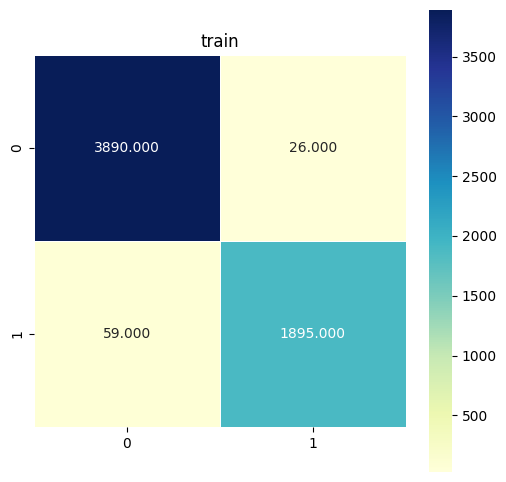

In [54]:
#now using better splitting
open1=XGBClassifier().fit(df_hum_feature_train2,df_hum_target_train2)
pred_te=open1.predict(df_hum_feature_test2)
pred_tr=open1.predict(df_hum_feature_train2)
conf_train = confusion_matrix(df_hum_target_train2, pred_tr)
conf_test = confusion_matrix(df_hum_target_test2, pred_te)
print(conf_train)
plt.figure(figsize = (6, 6));
sns.heatmap(conf_train, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("train")

[[2474  104]
 [ 208 1121]]


(<AxesSubplot:title={'center':'test'}>, Text(0.5, 1.0, 'test'))

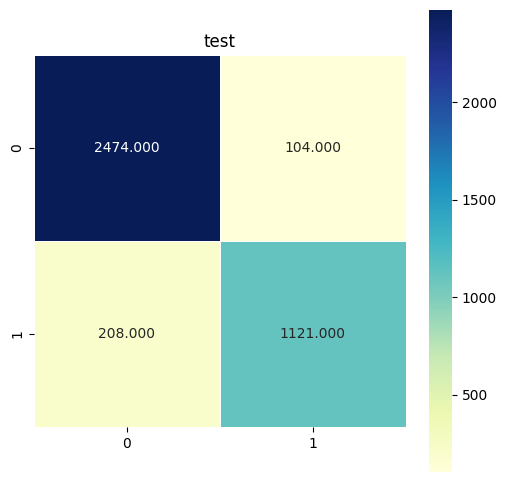

In [100]:
print(conf_test)
plt.figure(figsize = (6, 6));
sns.heatmap(conf_test, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("test")

In [63]:
#return fraction of wrong predicted
def perwrong(conf_matrix):
    return 1-(np.sum(conf_matrix)-conf_matrix[0,1]-conf_matrix[1,0])/np.sum(conf_matrix)

In [102]:
#percentage wrong as measure
train_wrong=perwrong(conf_train)
print(train_wrong)
test_wrong=perwrong(conf_test)
print(test_wrong)

0.01141591412506393
0.07985666751983622


There is some overfitting, but it is relevant improvemnt, but need to look on confusion matrix.

Testing do_xgb_class

In [65]:
ar=do_xgb_class(df_hum_train.iloc[:,0:9],df_hum_train.iloc[:,9],df_hum_test.iloc[:,0:9],df_hum_test.iloc[:,9],max_depth=5,reg=10)
print(ar)

xgb took 0.1406 seconds
percentage wrong test 8.23
percentage wrong train 7.35 
[10.          5.          0.07348679  0.08233188]


In [156]:
#do 1 to 8 always since sample changes often and it is fats enouygh
for i in range(1,9):
    loop_reg(df_hum_train.iloc[:,0:9],df_hum_train.iloc[:,9], df_hum_test.iloc[:,0:9],df_hum_test.iloc[:,9],i,0.1,1.414,20,'take_open_human_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1156 seconds
percentage wrong test 9.41
percentage wrong train 8.92 
doing case 1
xgb took 0.0383 seconds
percentage wrong test 9.33
percentage wrong train 8.93 
doing case 2
xgb took 0.0601 seconds
percentage wrong test 9.41
percentage wrong train 8.93 
doing case 3
xgb took 0.0396 seconds
percentage wrong test 9.33
percentage wrong train 8.97 
doing case 4
xgb took 0.039 seconds
percentage wrong test 9.33
percentage wrong train 9.0 
doing case 5
xgb took 0.04 seconds
percentage wrong test 9.36
percentage wrong train 8.99 
doing case 6
xgb took 0.0531 seconds
percentage wrong test 9.36
percentage wrong train 8.99 
doing case 7
xgb took 0.0414 seconds
percentage wrong test 9.36
percentage wrong train 9.04 
doing case 8
xgb took 0.0388 seconds
percentage wrong test 9.36
percentage wrong train 9.05 
doing case 9
xgb took 0.0399 seconds
percentage wrong test 9.31
percentage wrong train 8.99 
doing case 10
xgb took 0.0564 seconds
percentage wrong test 9.41
percentag

xgb took 0.1167 seconds
percentage wrong test 7.16
percentage wrong train 4.02 
doing case 10
xgb took 0.3275 seconds
percentage wrong test 7.41
percentage wrong train 4.6 
doing case 11
xgb took 0.2041 seconds
percentage wrong test 7.49
percentage wrong train 5.66 
doing case 12
xgb took 0.1639 seconds
percentage wrong test 8.05
percentage wrong train 6.6 
doing case 13
xgb took 0.1513 seconds
percentage wrong test 8.13
percentage wrong train 7.26 
doing case 14
xgb took 0.148 seconds
percentage wrong test 8.46
percentage wrong train 7.71 
doing case 15
xgb took 0.1044 seconds
percentage wrong test 9.0
percentage wrong train 8.24 
doing case 16
xgb took 0.0921 seconds
percentage wrong test 8.9
percentage wrong train 8.35 
doing case 17
xgb took 0.0663 seconds
percentage wrong test 8.97
percentage wrong train 8.54 
doing case 18
xgb took 0.0662 seconds
percentage wrong test 9.0
percentage wrong train 8.51 
doing case 19
xgb took 0.0831 seconds
percentage wrong test 9.36
percentage wron

Text(0, 0.5, '% wrong')

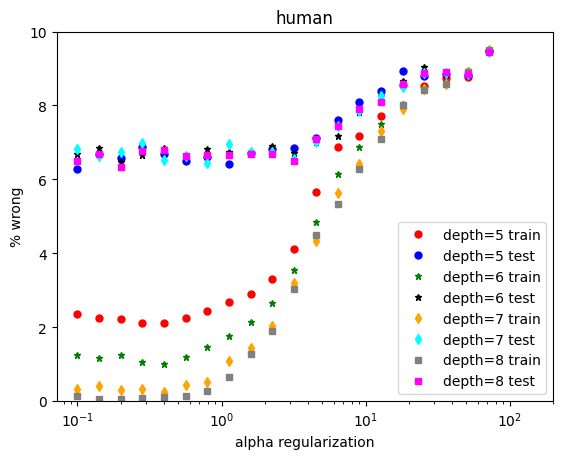

In [70]:
take5=np.loadtxt('take_open_human_xgb_depth5.txt')
take6=np.loadtxt('take_open_human_xgb_depth6.txt')
take7=np.loadtxt('take_open_human_xgb_depth7.txt')
take8=np.loadtxt('take_open_human_xgb_depth8.txt')
plt.plot(take5[0,:],100*take5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(take5[0,:],100*take5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(take6[0,:],100*take6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(take6[0,:],100*take6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(take7[0,:],100*take7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(take7[0,:],100*take7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(take8[0,:],100*take8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(take8[0,:],100*take8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

The differences in test seem to be very small, besides that beyound some regularization it gets worse. Not clear what is bets, should also look into logistic.

Now looking on games being only in training or test or in both.

In [157]:
#now separating test and train by separate games 
for i in range(1,9):
    loop_reg(df_hum_feature_train2,df_hum_target_train2,df_hum_feature_test2,df_hum_target_test2,i,0.1,1.414,30,'take_open_hum2_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1197 seconds
percentage wrong test 8.63
percentage wrong train 9.17 
doing case 1
xgb took 0.0387 seconds
percentage wrong test 8.6
percentage wrong train 9.18 
doing case 2
xgb took 0.0573 seconds
percentage wrong test 8.6
percentage wrong train 9.18 
doing case 3
xgb took 0.0422 seconds
percentage wrong test 8.65
percentage wrong train 9.18 
doing case 4
xgb took 0.0439 seconds
percentage wrong test 8.63
percentage wrong train 9.13 
doing case 5
xgb took 0.0445 seconds
percentage wrong test 8.6
percentage wrong train 9.15 
doing case 6
xgb took 0.067 seconds
percentage wrong test 8.63
percentage wrong train 9.17 
doing case 7
xgb took 0.0674 seconds
percentage wrong test 8.73
percentage wrong train 9.17 
doing case 8
xgb took 0.0442 seconds
percentage wrong test 8.73
percentage wrong train 9.23 
doing case 9
xgb took 0.0431 seconds
percentage wrong test 9.01
percentage wrong train 9.42 
doing case 10
xgb took 0.0512 seconds
percentage wrong test 9.01
percentag

percentage wrong test 32.67
percentage wrong train 33.29 
doing case 28
xgb took 0.1611 seconds
percentage wrong test 32.67
percentage wrong train 33.29 
doing case 29
xgb took 0.0496 seconds
percentage wrong test 32.67
percentage wrong train 33.29 
doing case 0
xgb took 0.1725 seconds
percentage wrong test 7.35
percentage wrong train 4.19 
doing case 1
xgb took 0.111 seconds
percentage wrong test 7.5
percentage wrong train 4.09 
doing case 2
xgb took 0.1214 seconds
percentage wrong test 7.5
percentage wrong train 4.05 
doing case 3
xgb took 0.1101 seconds
percentage wrong test 7.68
percentage wrong train 4.0 
doing case 4
xgb took 0.1294 seconds
percentage wrong test 7.5
percentage wrong train 4.0 
doing case 5
xgb took 0.1009 seconds
percentage wrong test 7.48
percentage wrong train 4.09 
doing case 6
xgb took 0.1191 seconds
percentage wrong test 7.5
percentage wrong train 4.17 
doing case 7
xgb took 0.1103 seconds
percentage wrong test 7.45
percentage wrong train 4.4 
doing case 8
x

xgb took 0.075 seconds
percentage wrong test 32.67
percentage wrong train 33.29 
doing case 27
xgb took 0.0429 seconds
percentage wrong test 32.67
percentage wrong train 33.29 
doing case 28
xgb took 0.0438 seconds
percentage wrong test 32.67
percentage wrong train 33.29 
doing case 29
xgb took 0.044 seconds
percentage wrong test 32.67
percentage wrong train 33.29 
doing case 0
xgb took 0.7128 seconds
percentage wrong test 6.68
percentage wrong train 0.6 
doing case 1
xgb took 0.1589 seconds
percentage wrong test 6.66
percentage wrong train 0.48 
doing case 2
xgb took 0.1911 seconds
percentage wrong test 6.53
percentage wrong train 0.56 
doing case 3
xgb took 0.1909 seconds
percentage wrong test 6.76
percentage wrong train 0.49 
doing case 4
xgb took 0.2205 seconds
percentage wrong test 6.63
percentage wrong train 0.6 
doing case 5
xgb took 0.1627 seconds
percentage wrong test 6.61
percentage wrong train 0.53 
doing case 6
xgb took 0.2395 seconds
percentage wrong test 6.48
percentage w

Text(0, 0.5, '% wrong')

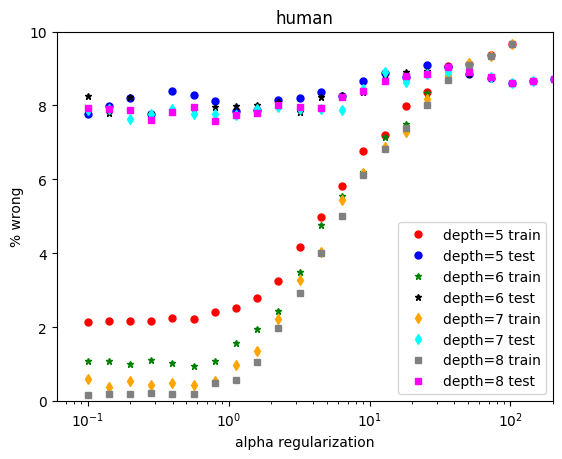

In [75]:
take5b=np.loadtxt('take_open_hum2_xgb_depth5.txt')
take6b=np.loadtxt('take_open_hum2_xgb_depth6.txt')
take7b=np.loadtxt('take_open_hum2_xgb_depth7.txt')
take8b=np.loadtxt('take_open_hum2_xgb_depth8.txt')
plt.plot(take5b[0,:],100*take5b[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(take5b[0,:],100*take5b[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(take6b[0,:],100*take6b[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(take6b[0,:],100*take6b[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(take7b[0,:],100*take7b[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(take7b[0,:],100*take7b[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(take8b[0,:],100*take8b[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(take8b[0,:],100*take8b[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

Some change similar as for win below, still no clear minimum, still less free paramter should be betetr in general but I should add logistic also since that is easier to extrapolate outside the tested area. 


Now looking on winning.

In [158]:
for i in range(1,9):
    loop_reg(df_win_train.iloc[:,0:9],df_win_train.iloc[:,9], df_win_test.iloc[:,0:9],df_win_test.iloc[:,9],i,0.1,1.414,20,'take_open_win_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1095 seconds
percentage wrong test 9.37
percentage wrong train 9.57 
doing case 1
xgb took 0.0407 seconds
percentage wrong test 9.29
percentage wrong train 9.52 
doing case 2
xgb took 0.0566 seconds
percentage wrong test 9.42
percentage wrong train 9.6 
doing case 3
xgb took 0.0433 seconds
percentage wrong test 9.37
percentage wrong train 9.57 
doing case 4
xgb took 0.0408 seconds
percentage wrong test 9.32
percentage wrong train 9.55 
doing case 5
xgb took 0.0399 seconds
percentage wrong test 9.4
percentage wrong train 9.57 
doing case 6
xgb took 0.0557 seconds
percentage wrong test 9.24
percentage wrong train 9.6 
doing case 7
xgb took 0.1753 seconds
percentage wrong test 9.42
percentage wrong train 9.55 
doing case 8
xgb took 0.0577 seconds
percentage wrong test 9.32
percentage wrong train 9.55 
doing case 9
xgb took 0.0477 seconds
percentage wrong test 9.32
percentage wrong train 9.58 
doing case 10
xgb took 0.0455 seconds
percentage wrong test 9.4
percentag

xgb took 0.1542 seconds
percentage wrong test 7.95
percentage wrong train 3.39 
doing case 10
xgb took 0.1252 seconds
percentage wrong test 8.0
percentage wrong train 4.44 
doing case 11
xgb took 0.1369 seconds
percentage wrong test 8.02
percentage wrong train 5.28 
doing case 12
xgb took 0.0902 seconds
percentage wrong test 8.1
percentage wrong train 6.43 
doing case 13
xgb took 0.0978 seconds
percentage wrong test 8.53
percentage wrong train 6.91 
doing case 14
xgb took 0.0762 seconds
percentage wrong test 8.58
percentage wrong train 7.62 
doing case 15
xgb took 0.0793 seconds
percentage wrong test 9.04
percentage wrong train 8.28 
doing case 16
xgb took 0.0706 seconds
percentage wrong test 9.37
percentage wrong train 8.96 
doing case 17
xgb took 0.0771 seconds
percentage wrong test 9.4
percentage wrong train 8.91 
doing case 18
xgb took 0.4477 seconds
percentage wrong test 9.22
percentage wrong train 9.62 
doing case 19
xgb took 0.0647 seconds
percentage wrong test 9.01
percentage w

In [160]:

#now separating test and train by separate games 
for i in range(1,9):
    loop_reg(df_win_feature_train2,df_win_target_train2, df_win_feature_test2,df_win_target_test2,i,0.1,1.414,30,'take_open_win2_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1 seconds
percentage wrong test 9.08
percentage wrong train 9.15 
doing case 1
xgb took 0.0405 seconds
percentage wrong test 9.08
percentage wrong train 9.15 
doing case 2
xgb took 0.0539 seconds
percentage wrong test 9.0
percentage wrong train 9.14 
doing case 3
xgb took 0.0445 seconds
percentage wrong test 9.0
percentage wrong train 9.14 
doing case 4
xgb took 0.0404 seconds
percentage wrong test 9.0
percentage wrong train 9.14 
doing case 5
xgb took 0.0476 seconds
percentage wrong test 9.03
percentage wrong train 9.08 
doing case 6
xgb took 0.0628 seconds
percentage wrong test 9.03
percentage wrong train 9.12 
doing case 7
xgb took 0.0459 seconds
percentage wrong test 9.03
percentage wrong train 9.22 
doing case 8
xgb took 0.045 seconds
percentage wrong test 9.05
percentage wrong train 9.15 
doing case 9
xgb took 0.0449 seconds
percentage wrong test 9.05
percentage wrong train 9.22 
doing case 10
xgb took 0.0649 seconds
percentage wrong test 9.05
percentage w

xgb took 0.0544 seconds
percentage wrong test 32.52
percentage wrong train 31.74 
doing case 0
xgb took 0.1079 seconds
percentage wrong test 7.65
percentage wrong train 4.16 
doing case 1
xgb took 0.1132 seconds
percentage wrong test 7.75
percentage wrong train 4.04 
doing case 2
xgb took 0.5101 seconds
percentage wrong test 7.86
percentage wrong train 4.35 
doing case 3
xgb took 0.1601 seconds
percentage wrong test 7.68
percentage wrong train 4.33 
doing case 4
xgb took 0.1195 seconds
percentage wrong test 7.63
percentage wrong train 3.99 
doing case 5
xgb took 0.1202 seconds
percentage wrong test 7.53
percentage wrong train 4.31 
doing case 6
xgb took 0.1184 seconds
percentage wrong test 7.68
percentage wrong train 4.23 
doing case 7
xgb took 0.1112 seconds
percentage wrong test 7.55
percentage wrong train 4.36 
doing case 8
xgb took 0.1344 seconds
percentage wrong test 7.58
percentage wrong train 4.55 
doing case 9
xgb took 0.1025 seconds
percentage wrong test 7.78
percentage wrong 

xgb took 0.0593 seconds
percentage wrong test 32.52
percentage wrong train 31.74 
doing case 29
xgb took 0.0398 seconds
percentage wrong test 32.52
percentage wrong train 31.74 
doing case 0
xgb took 0.2036 seconds
percentage wrong test 6.97
percentage wrong train 0.14 
doing case 1
xgb took 0.1991 seconds
percentage wrong test 6.97
percentage wrong train 0.24 
doing case 2
xgb took 0.2112 seconds
percentage wrong test 6.81
percentage wrong train 0.19 
doing case 3
xgb took 0.2032 seconds
percentage wrong test 6.84
percentage wrong train 0.19 
doing case 4
xgb took 0.2174 seconds
percentage wrong test 6.81
percentage wrong train 0.19 
doing case 5
xgb took 0.2072 seconds
percentage wrong test 6.84
percentage wrong train 0.29 
doing case 6
xgb took 0.3196 seconds
percentage wrong test 6.79
percentage wrong train 0.34 
doing case 7
xgb took 0.2074 seconds
percentage wrong test 6.84
percentage wrong train 0.66 
doing case 8
xgb took 0.2061 seconds
percentage wrong test 6.76
percentage wro

Clearly different bevahiour, test is worse than before at least for small reguluarization. Is likely too extreme to use it since the samplies in it are not randomly ordered (Different computer strategy and also human strategies change likely). I just scramble them in the list. 

Text(0, 0.5, '% wrong')

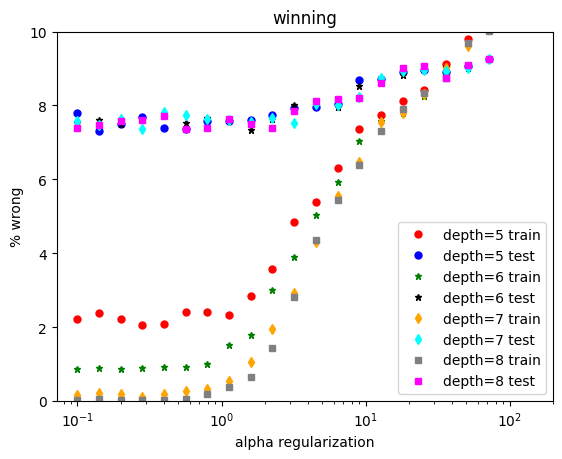

In [84]:
wtake5=np.loadtxt('take_open_win_xgb_depth5.txt')
wtake6=np.loadtxt('take_open_win_xgb_depth6.txt')
wtake7=np.loadtxt('take_open_win_xgb_depth7.txt')
wtake8=np.loadtxt('take_open_win_xgb_depth8.txt')
plt.plot(wtake5[0,:],100*wtake5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(wtake5[0,:],100*wtake5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(wtake6[0,:],100*wtake6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wtake6[0,:],100*wtake6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wtake7[0,:],100*wtake7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wtake7[0,:],100*wtake7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wtake8[0,:],100*wtake8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wtake8[0,:],100*wtake8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

Here at least variance seems to get smaller around a regularziation of 2 maybe indicating that this is the best one. 

That was before rerun with slightly larger sample, thus different split, now it looks different again. 

In general it is likely that the sample is too small to be very reliable, also likely the different data sets are likely too much correlated due to sharing states. 

Text(0, 0.5, '% wrong')

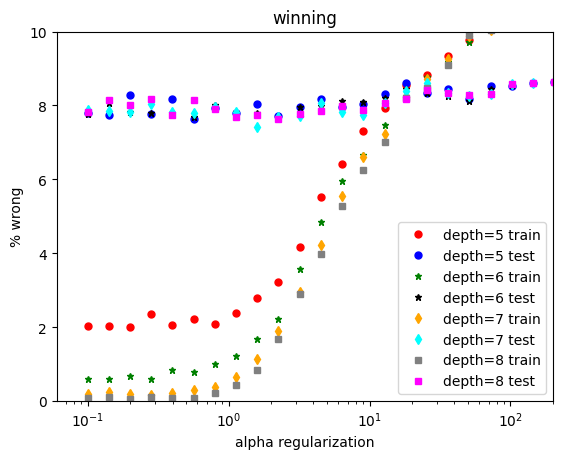

In [85]:
w2take5=np.loadtxt('take_open_win2_xgb_depth5.txt')
w2take6=np.loadtxt('take_open_win2_xgb_depth6.txt')
w2take7=np.loadtxt('take_open_win2_xgb_depth7.txt')
w2take8=np.loadtxt('take_open_win2_xgb_depth8.txt')
plt.plot(w2take5[0,:],100*w2take5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(w2take5[0,:],100*w2take5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(w2take6[0,:],100*w2take6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(w2take6[0,:],100*w2take6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(w2take7[0,:],100*w2take7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(w2take7[0,:],100*w2take7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(w2take8[0,:],100*w2take8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(w2take8[0,:],100*w2take8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

Now bigger differences at least depth 5 looks worse now and also depth 6 needs smaller regularization.

Now with different split it loos even less clear, only really large regulraization is disfavored. 

Since the scatter is partly random, a single dip is likely that and should be ignored. 
There is still no clear minimum. 


Now looking on logistic regression.


[[3719  249]
 [ 350 1551]]


(<AxesSubplot:title={'center':'Logistic train'}>,
 Text(0.5, 1.0, 'Logistic train'))

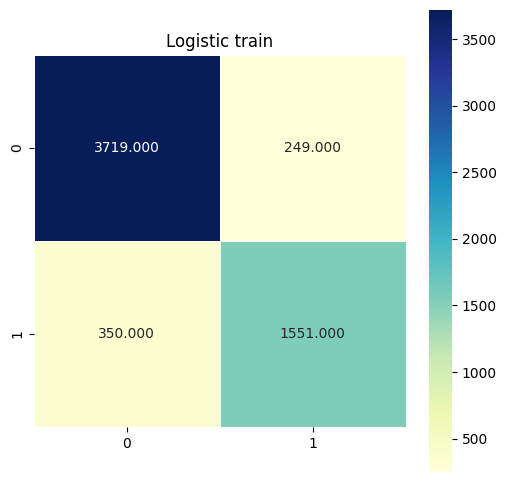

In [105]:
#a few nan remove
df_hum_feature_train2[df_hum_feature_train2.isnull()]=0
df_hum_feature_test2[df_hum_feature_test2.isnull()]=0
df_hum_target_train2[df_hum_target_train2.isnull()]=0
df_hum_target_test2[df_hum_target_test2.isnull()]=0
lopen1=LogisticRegression().fit(df_hum_feature_train2,df_hum_target_train2)
lpred_te=lopen1.predict(df_hum_feature_test2)
lpred_tr=lopen1.predict(df_hum_feature_train2)
lconf_train = confusion_matrix(df_hum_target_train2, lpred_tr)
lconf_test = confusion_matrix(df_hum_target_test2, lpred_te)
print(lconf_train)
plt.figure(figsize = (6, 6));
sns.heatmap(lconf_train, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("Logistic train")

[[2461  117]
 [ 298 1031]]


(<AxesSubplot:title={'center':'Logistic test'}>,
 Text(0.5, 1.0, 'Logistic test'))

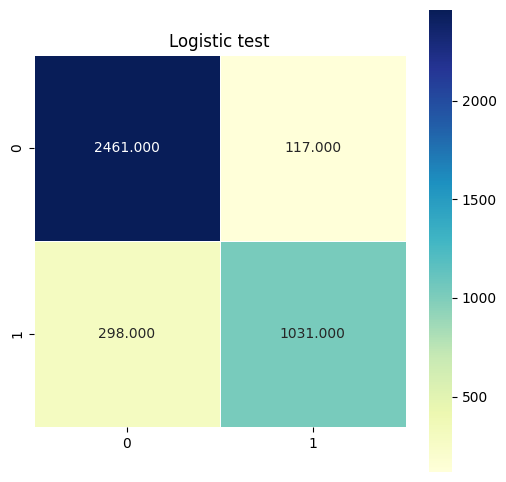

In [106]:

print(lconf_test)
plt.figure(figsize = (6, 6));
sns.heatmap(lconf_test, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("Logistic test")

In [109]:
print("XGBoost standard")
print(f"wrong in train: {round(100*train_wrong,2)} %")
print(f"wrong in test: {round(100*test_wrong,2)} %")
ltest_wrong=perwrong(lconf_test)
ltrain_wrong=perwrong(lconf_train)
print("Logistic standard")
print(f"wrong in train: {round(100*ltrain_wrong,2)} %")
print(f"wrong in test: {round(100*ltest_wrong,2)} %")

XGBoost standard
wrong in train: 1.14 %
wrong in test: 7.99 %
Logistic standard
wrong in train: 10.21 %
wrong in test: 10.62 %


Text(0, 0.5, 'feature importance')

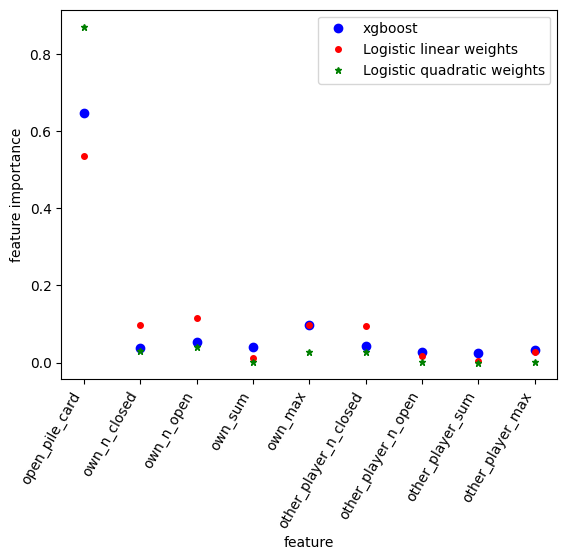

In [155]:

resl=np.zeros((4,9))
for i in range(9):
    resl[0,i]=np.std(df_hum_feature_train2.iloc[:,i])
    resl[1,i]=1/resl[0,i]*lopen1.coef_[0,i]
#relative importance    
resl[2]=abs(resl[1])/sum(abs(resl[1]))    
resl[3]=abs(resl[1]**2)/sum(abs(resl[1]**2)) 
#using coefficents my self sigmoid( dot([val1, val2, 2], lr.coef_.T) )
plt.plot(df_hum_feature_train2.columns,open1.feature_importances_,'o',ms=6,color='blue',label='xgboost') 
plt.plot(df_hum_feature_train2.columns,resl[2],'o',ms=4,color='red',label='Logistic linear coefficients') 
plt.plot(df_hum_feature_train2.columns,resl[3],'*',ms=5,color='green',label='Logistic quadratic coefficents') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=60, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")

As expected open card value is the most important one. That is is similar for logistic and xgboost. 

Logistic is worse than xgboost. The difference is much bigger in train but still clear also in test. Likely some non linearity causes it.
Later feature enegreing will be explored to improve it, but for now I just concentrate on xgboost. 

Now looking on action discard, only cases which are not taken open are considered since the others are trivially 0.

In [161]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_hum_feature_train2_discard,df_hum_target_train2_discard,df_hum_feature_test2_discard,df_hum_target_test2_discard,i,0.1,1.414,30,'discard_hum2_xgb_depth'+str(i)+'.txt',False)

doing max depth of 1
doing case 0
xgb took 0.1239 seconds
percentage wrong test 9.6
percentage wrong train 9.59 
doing case 1
xgb took 0.0322 seconds
percentage wrong test 9.6
percentage wrong train 9.59 
doing case 2
xgb took 0.0493 seconds
percentage wrong test 9.52
percentage wrong train 9.54 
doing case 3
xgb took 0.033 seconds
percentage wrong test 9.52
percentage wrong train 9.51 
doing case 4
xgb took 0.0326 seconds
percentage wrong test 9.6
percentage wrong train 9.62 
doing case 5
xgb took 0.0326 seconds
percentage wrong test 9.64
percentage wrong train 9.56 
doing case 6
xgb took 0.0349 seconds
percentage wrong test 9.56
percentage wrong train 9.62 
doing case 7
xgb took 0.0459 seconds
percentage wrong test 9.64
percentage wrong train 9.62 
doing case 8
xgb took 0.0322 seconds
percentage wrong test 9.56
percentage wrong train 9.62 
doing case 9
xgb took 0.0331 seconds
percentage wrong test 9.6
percentage wrong train 9.67 
doing case 10
xgb took 0.0361 seconds
percentage wrong

xgb took 0.0473 seconds
percentage wrong test 47.46
percentage wrong train 49.95 
doing max depth of 4
doing case 0
xgb took 0.0686 seconds
percentage wrong test 6.78
percentage wrong train 2.78 
doing case 1
xgb took 0.0713 seconds
percentage wrong test 7.05
percentage wrong train 2.96 
doing case 2
xgb took 0.084 seconds
percentage wrong test 7.05
percentage wrong train 3.49 
doing case 3
xgb took 0.0965 seconds
percentage wrong test 6.78
percentage wrong train 3.37 
doing case 4
xgb took 0.0957 seconds
percentage wrong test 6.52
percentage wrong train 2.94 
doing case 5
xgb took 0.0871 seconds
percentage wrong test 7.13
percentage wrong train 3.21 
doing case 6
xgb took 0.1111 seconds
percentage wrong test 7.13
percentage wrong train 3.21 
doing case 7
xgb took 0.0798 seconds
percentage wrong test 7.4
percentage wrong train 3.26 
doing case 8
xgb took 0.0744 seconds
percentage wrong test 6.98
percentage wrong train 3.69 
doing case 9
xgb took 0.0826 seconds
percentage wrong test 6.9

xgb took 0.2794 seconds
percentage wrong test 47.46
percentage wrong train 49.95 
doing case 27
xgb took 0.0968 seconds
percentage wrong test 47.46
percentage wrong train 49.95 
doing case 28
xgb took 0.0953 seconds
percentage wrong test 47.46
percentage wrong train 49.95 
doing case 29
xgb took 0.0358 seconds
percentage wrong test 47.46
percentage wrong train 49.95 
doing max depth of 7
doing case 0
xgb took 0.1943 seconds
percentage wrong test 6.82
percentage wrong train 0.08 
doing case 1
xgb took 0.313 seconds
percentage wrong test 6.67
percentage wrong train 0.13 
doing case 2
xgb took 0.2086 seconds
percentage wrong test 6.82
percentage wrong train 0.1 
doing case 3
xgb took 0.1629 seconds
percentage wrong test 6.55
percentage wrong train 0.08 
doing case 4
xgb took 0.1637 seconds
percentage wrong test 6.59
percentage wrong train 0.18 
doing case 5
xgb took 0.1653 seconds
percentage wrong test 6.55
percentage wrong train 0.15 
doing case 6
xgb took 0.1484 seconds
percentage wrong

Text(0, 0.5, '% wrong')

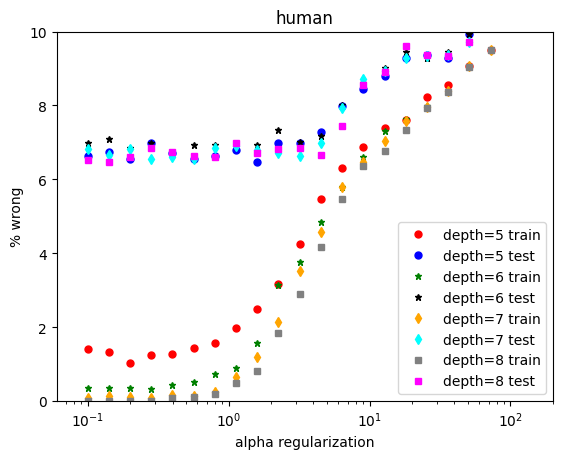

In [60]:
hdis5=np.loadtxt('discard_hum2_xgb_depth5.txt')
hdis6=np.loadtxt('discard_hum2_xgb_depth6.txt')
hdis7=np.loadtxt('discard_hum2_xgb_depth7.txt')
hdis8=np.loadtxt('discard_hum2_xgb_depth8.txt')
plt.plot(hdis5[0,:],100*hdis5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(hdis5[0,:],100*hdis5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(hdis6[0,:],100*hdis6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(hdis6[0,:],100*hdis6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(hdis7[0,:],100*hdis7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(hdis7[0,:],100*hdis7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(hdis8[0,:],100*hdis8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(hdis8[0,:],100*hdis8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

Similar as before differences are small, likely it is not very important which one is chosen. 

In [162]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_win_feature_train2_discard,df_win_target_train2_discard,df_win_feature_test2_discard,df_win_target_test2_discard,i,0.1,1.414,30,'discard_win2_xgb_depth'+str(i)+'.txt',False)

doing max depth of 1
doing case 0
xgb took 0.1185 seconds
percentage wrong test 12.4
percentage wrong train 11.33 
doing case 1
xgb took 0.0382 seconds
percentage wrong test 12.4
percentage wrong train 11.33 
doing case 2
xgb took 0.0529 seconds
percentage wrong test 12.62
percentage wrong train 11.33 
doing case 3
xgb took 0.0348 seconds
percentage wrong test 12.62
percentage wrong train 11.35 
doing case 4
xgb took 0.0327 seconds
percentage wrong test 12.47
percentage wrong train 11.28 
doing case 5
xgb took 0.0344 seconds
percentage wrong test 12.47
percentage wrong train 11.25 
doing case 6
xgb took 0.0365 seconds
percentage wrong test 12.51
percentage wrong train 11.3 
doing case 7
xgb took 0.0507 seconds
percentage wrong test 12.51
percentage wrong train 11.33 
doing case 8
xgb took 0.0335 seconds
percentage wrong test 12.4
percentage wrong train 11.18 
doing case 9
xgb took 0.0329 seconds
percentage wrong test 12.47
percentage wrong train 11.35 
doing case 10
xgb took 0.0336 sec

percentage wrong test 43.59
percentage wrong train 44.88 
doing case 29
xgb took 0.0447 seconds
percentage wrong test 43.59
percentage wrong train 44.88 
doing max depth of 4
doing case 0
xgb took 0.078 seconds
percentage wrong test 9.57
percentage wrong train 4.01 
doing case 1
xgb took 0.187 seconds
percentage wrong test 9.57
percentage wrong train 4.21 
doing case 2
xgb took 0.078 seconds
percentage wrong test 9.8
percentage wrong train 4.14 
doing case 3
xgb took 0.0771 seconds
percentage wrong test 9.65
percentage wrong train 3.84 
doing case 4
xgb took 0.093 seconds
percentage wrong test 9.72
percentage wrong train 4.24 
doing case 5
xgb took 0.0789 seconds
percentage wrong test 9.87
percentage wrong train 4.14 
doing case 6
xgb took 0.0871 seconds
percentage wrong test 9.57
percentage wrong train 4.41 
doing case 7
xgb took 0.0866 seconds
percentage wrong test 9.38
percentage wrong train 4.41 
doing case 8
xgb took 0.0787 seconds
percentage wrong test 10.1
percentage wrong train

percentage wrong test 43.59
percentage wrong train 44.88 
doing case 28
xgb took 0.0431 seconds
percentage wrong test 43.59
percentage wrong train 44.88 
doing case 29
xgb took 0.0327 seconds
percentage wrong test 43.59
percentage wrong train 44.88 
doing max depth of 7
doing case 0
xgb took 0.1757 seconds
percentage wrong test 9.01
percentage wrong train 0.0 
doing case 1
xgb took 0.164 seconds
percentage wrong test 9.19
percentage wrong train 0.02 
doing case 2
xgb took 0.2551 seconds
percentage wrong test 9.5
percentage wrong train 0.02 
doing case 3
xgb took 0.1694 seconds
percentage wrong test 9.61
percentage wrong train 0.0 
doing case 4
xgb took 0.1625 seconds
percentage wrong test 9.12
percentage wrong train 0.05 
doing case 5
xgb took 0.182 seconds
percentage wrong test 9.34
percentage wrong train 0.12 
doing case 6
xgb took 0.165 seconds
percentage wrong test 9.34
percentage wrong train 0.25 
doing case 7
xgb took 0.1866 seconds
percentage wrong test 9.23
percentage wrong tra

Text(0, 0.5, '% wrong')

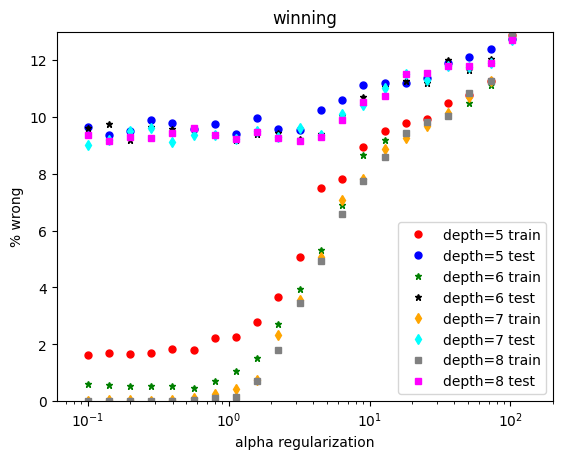

In [63]:
wdis5=np.loadtxt('discard_win2_xgb_depth5.txt')
wdis6=np.loadtxt('discard_win2_xgb_depth6.txt')
wdis7=np.loadtxt('discard_win2_xgb_depth7.txt')
wdis8=np.loadtxt('discard_win2_xgb_depth8.txt')
plt.plot(wdis5[0,:],100*wdis5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(wdis5[0,:],100*wdis5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(wdis6[0,:],100*wdis6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wdis6[0,:],100*wdis6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wdis7[0,:],100*wdis7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wdis7[0,:],100*wdis7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wdis8[0,:],100*wdis8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wdis8[0,:],100*wdis8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,13)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

There seems to be a minimum, for depth 8, regularization of 9. 
But changes with random draw

Now looking on which card to take, when closed need to be taken that is ignored. 
This is a regression, and closed has the value of 5.07. That means it is similar to 5, that is not true fully but should be the best approximations for small number of cards. 


In [163]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_hum_feature_train2_value,df_hum_target_train2_value,df_hum_feature_test2_value,df_hum_target_test2_value,i,0.1,1.414,30,'value_hum2_xgb_depth'+str(i)+'.txt',True)

doing max depth of 1
doing case 0
xgb took 0.1205 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5603 points
standard deviation of prediction-train 1.565 points
doing case 1
xgb took 0.0377 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5603 points
standard deviation of prediction-train 1.565 points
doing case 2
xgb took 0.0646 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5591 points
standard deviation of prediction-train 1.5651 points
doing case 3
xgb took 0.0388 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5601 points
standard deviation of prediction-train 1.5651 points
doing case 4
xgb took 0.0399 seconds
standard deviation of test 2.5419 points

xgb took 0.114 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.525 points
standard deviation of prediction-train 1.4185 points
doing case 10
xgb took 0.0412 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5227 points
standard deviation of prediction-train 1.4259 points
doing case 11
xgb took 0.0458 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5236 points
standard deviation of prediction-train 1.4251 points
doing case 12
xgb took 0.0468 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5271 points
standard deviation of prediction-train 1.4332 points
doing case 13
xgb took 0.0443 seconds
standard deviation of test 2.5419 points
standard deviation of train 2

xgb took 0.0443 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5285 points
standard deviation of prediction-train 1.4367 points
doing case 18
xgb took 0.0607 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5462 points
standard deviation of prediction-train 1.4598 points
doing case 19
xgb took 0.0401 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5511 points
standard deviation of prediction-train 1.4869 points
doing case 20
xgb took 0.0497 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5634 points
standard deviation of prediction-train 1.5032 points
doing case 21
xgb took 0.0465 seconds
standard deviation of test 2.5419 points
standard deviation of train

xgb took 0.0422 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.6317 points
standard deviation of prediction-train 1.6075 points
doing case 25
xgb took 0.0401 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.656 points
standard deviation of prediction-train 1.6442 points
doing case 26
xgb took 0.038 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.7107 points
standard deviation of prediction-train 1.6968 points
doing case 27
xgb took 0.0348 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.7475 points
standard deviation of prediction-train 1.7524 points
doing case 28
xgb took 0.0336 seconds
standard deviation of test 2.5419 points
standard deviation of train 2

xgb took 0.1114 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5692 points
standard deviation of prediction-train 0.5982 points
doing case 3
xgb took 0.1105 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.593 points
standard deviation of prediction-train 0.559 points
doing case 4
xgb took 0.1174 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.61 points
standard deviation of prediction-train 0.5743 points
doing case 5
xgb took 0.1203 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5835 points
standard deviation of prediction-train 0.5447 points
doing case 6
xgb took 0.1094 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105 

xgb took 0.1413 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5699 points
standard deviation of prediction-train 0.5003 points
doing case 11
xgb took 0.1361 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5756 points
standard deviation of prediction-train 0.5713 points
doing case 12
xgb took 0.1401 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5642 points
standard deviation of prediction-train 0.6556 points
doing case 13
xgb took 0.1287 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5387 points
standard deviation of prediction-train 0.7693 points
doing case 14
xgb took 0.1465 seconds
standard deviation of test 2.5419 points
standard deviation of train

xgb took 0.0624 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5555 points
standard deviation of prediction-train 1.363 points
doing case 19
xgb took 0.0678 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5682 points
standard deviation of prediction-train 1.4074 points
doing case 20
xgb took 0.048 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5729 points
standard deviation of prediction-train 1.4588 points
doing case 21
xgb took 0.0466 seconds
standard deviation of test 2.5419 points
standard deviation of train 2.6105  points
standard deviation of prediction-test 1.5958 points
standard deviation of prediction-train 1.5104 points
doing case 22
xgb took 0.0483 seconds
standard deviation of test 2.5419 points
standard deviation of train 2

Text(0, 0.5, 'standard deviation [points]')

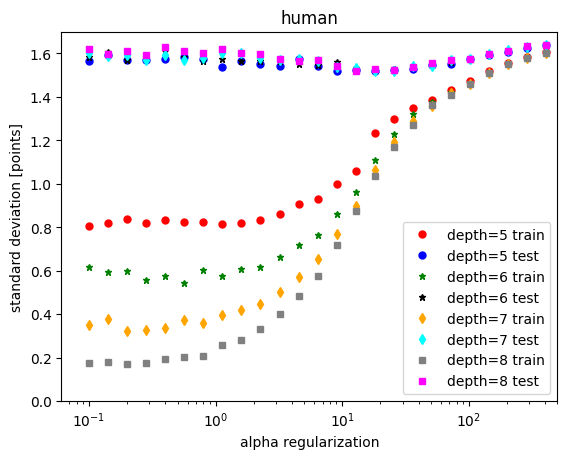

In [70]:
hval5=np.loadtxt('value_hum2_xgb_depth5.txt')
hval6=np.loadtxt('value_hum2_xgb_depth6.txt')
hval7=np.loadtxt('value_hum2_xgb_depth7.txt')
hval8=np.loadtxt('value_hum2_xgb_depth8.txt')
plt.plot(hval5[0,:],hval5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(hval5[0,:],hval5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(hval6[0,:],hval6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(hval6[0,:],hval6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(hval7[0,:],hval7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(hval7[0,:],hval7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(hval8[0,:],hval8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(hval8[0,:],hval8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,500)
plt.ylim(0,1.7)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("standard deviation [points]")

Minimum is clearer here. Is understandable that rgression is easier than continuous nature means that for same row number there is more information.

Now winnning case. 

In [164]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_win_feature_train2_value,df_win_target_train2_value,df_win_feature_test2_value,df_win_target_test2_value,i,0.1,1.414,30,'value_win2_xgb_depth'+str(i)+'.txt',True)

doing max depth of 1
doing case 0
xgb took 0.1438 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5184 points
standard deviation of prediction-train 1.4354 points
doing case 1
xgb took 0.0333 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5184 points
standard deviation of prediction-train 1.4354 points
doing case 2
xgb took 0.0652 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5186 points
standard deviation of prediction-train 1.4355 points
doing case 3
xgb took 0.034 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5179 points
standard deviation of prediction-train 1.4355 points
doing case 4
xgb took 0.0323 seconds
standard deviation of test 2.5869 point

xgb took 0.0715 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4926 points
standard deviation of prediction-train 1.3172 points
doing case 8
xgb took 0.0481 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4869 points
standard deviation of prediction-train 1.3175 points
doing case 9
xgb took 0.0498 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4767 points
standard deviation of prediction-train 1.3163 points
doing case 10
xgb took 0.0487 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4835 points
standard deviation of prediction-train 1.321 points
doing case 11
xgb took 0.0661 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.

xgb took 0.1454 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4754 points
standard deviation of prediction-train 1.2347 points
doing case 15
xgb took 0.0644 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4771 points
standard deviation of prediction-train 1.2694 points
doing case 16
xgb took 0.1124 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4801 points
standard deviation of prediction-train 1.3011 points
doing case 17
xgb took 0.0637 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4886 points
standard deviation of prediction-train 1.3518 points
doing case 18
xgb took 0.0423 seconds
standard deviation of test 2.5869 points
standard deviation of train

xgb took 0.0684 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5501 points
standard deviation of prediction-train 1.4531 points
doing case 24
xgb took 0.049 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5539 points
standard deviation of prediction-train 1.4705 points
doing case 25
xgb took 0.0502 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5594 points
standard deviation of prediction-train 1.5001 points
doing case 26
xgb took 0.0529 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5886 points
standard deviation of prediction-train 1.5539 points
doing case 27
xgb took 0.0761 seconds
standard deviation of test 2.5869 points
standard deviation of train 

xgb took 0.2872 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5033 points
standard deviation of prediction-train 0.5102 points
doing case 1
xgb took 0.2653 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5176 points
standard deviation of prediction-train 0.5408 points
doing case 2
xgb took 0.3278 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5011 points
standard deviation of prediction-train 0.5112 points
doing case 3
xgb took 0.1545 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5196 points
standard deviation of prediction-train 0.5101 points
doing case 4
xgb took 0.174 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.74

xgb took 0.1759 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5026 points
standard deviation of prediction-train 0.3695 points
doing case 9
xgb took 0.1607 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5208 points
standard deviation of prediction-train 0.3878 points
doing case 10
xgb took 0.1753 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4987 points
standard deviation of prediction-train 0.4462 points
doing case 11
xgb took 0.1588 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.5068 points
standard deviation of prediction-train 0.5183 points
doing case 12
xgb took 0.1765 seconds
standard deviation of test 2.5869 points
standard deviation of train 

xgb took 0.2364 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4838 points
standard deviation of prediction-train 0.9776 points
doing case 16
xgb took 0.1528 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4706 points
standard deviation of prediction-train 1.1045 points
doing case 17
xgb took 0.1153 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4783 points
standard deviation of prediction-train 1.2102 points
doing case 18
xgb took 0.0814 seconds
standard deviation of test 2.5869 points
standard deviation of train 2.7418  points
standard deviation of prediction-test 1.4862 points
standard deviation of prediction-train 1.3037 points
doing case 19
xgb took 0.0695 seconds
standard deviation of test 2.5869 points
standard deviation of train

Text(0, 0.5, 'standard deviation [points]')

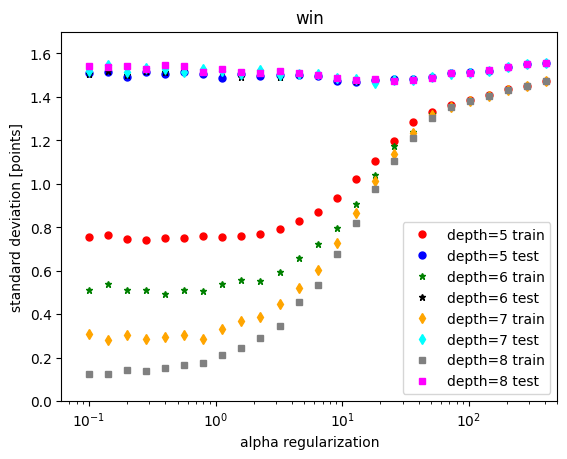

In [101]:
wval5=np.loadtxt('value_win2_xgb_depth5.txt')
wval6=np.loadtxt('value_win2_xgb_depth6.txt')
wval7=np.loadtxt('value_win2_xgb_depth7.txt')
wval8=np.loadtxt('value_win2_xgb_depth8.txt')
plt.plot(wval5[0,:],wval5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(wval5[0,:],wval5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(wval6[0,:],wval6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wval6[0,:],wval6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wval7[0,:],wval7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wval7[0,:],wval7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wval8[0,:],wval8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wval8[0,:],wval8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,500)
plt.ylim(0,1.7)
plt.xlabel("alpha regularization")
plt.title("win")
plt.ylabel("standard deviation [points]")

Now I determine the best option and let it run again and save it then.

I define a function for it. 

In [151]:
#parameters are the files with the metric and parameters, whether regression (default) or classification
def find_best(list_inputs,feature_train,target_train,output_file_name,regression=True):
    a=np.loadtxt(list_inputs[0])
    all_metrics=np.zeros((5,len(list_inputs),a.shape[1]))

    for i in range(len(list_inputs)):
        a=np.loadtxt(list_inputs[i])
        all_metrics[0:4,i,:]=a
    #first just using minimum in data, later maybe some smoothing, neighbor consideration    
    s1=np.unravel_index(np.argmin(all_metrics[3,:,:]),all_metrics[3,:,:].shape)
    if regression==True:
        print(f"minimum of {round(all_metrics[3,s1[0],s1[1]],2)} points is at alpha={round(all_metrics[0,s1[0],s1[1]],2)} and max_depth={int(all_metrics[1,s1[0],s1[1]])}")
        reg4=XGBRegressor(max_depth=int(all_metrics[1,s1[0],s1[1]]),reg_alpha=all_metrics[0,s1[0],s1[1]]).fit(feature_train, target_train)
        #and save it
        reg4.save_model(output_file_name)
    else: 
        print(f"minimum of {round(100*all_metrics[3,s1[0],s1[1]],2)} % is at alpha={round(all_metrics[0,s1[0],s1[1]],2)} and max_depth={int(all_metrics[1,s1[0],s1[1]])}")
        reg4=XGBClassifier(max_depth=int(all_metrics[1,s1[0],s1[1]]),reg_alpha=all_metrics[0,s1[0],s1[1]]).fit(feature_train, target_train)
        #and save it
        reg4.save_model(output_file_name)        

Now running it for all the options of three targets and two different samples each. 

In [165]:
list_val_hum=['value_hum2_xgb_depth1.txt','value_hum2_xgb_depth2.txt','value_hum2_xgb_depth3.txt','value_hum2_xgb_depth4.txt','value_hum2_xgb_depth5.txt','value_hum2_xgb_depth6.txt','value_hum2_xgb_depth7.txt','value_hum2_xgb_depth8.txt']
find_best(list_val_hum,df_hum_feature_train2_value,df_hum_target_train2_value,'xgb_value_hum1.json')

minimum of 1.51 points is at alpha=0.57 and max_depth=3


In [166]:
list_val_win=['value_win2_xgb_depth1.txt','value_win2_xgb_depth2.txt','value_win2_xgb_depth3.txt','value_win2_xgb_depth4.txt','value_win2_xgb_depth5.txt','value_win2_xgb_depth6.txt','value_win2_xgb_depth7.txt','value_win2_xgb_depth8.txt']
find_best(list_val_win,df_win_feature_train2_value,df_win_target_train2_value,'xgb_value_win1.json')

minimum of 1.47 points is at alpha=18.06 and max_depth=7


In [167]:
list_op_hum=['take_open_hum2_xgb_depth1.txt','take_open_hum2_xgb_depth2.txt','take_open_hum2_xgb_depth3.txt','take_open_hum2_xgb_depth4.txt','take_open_hum2_xgb_depth5.txt','take_open_hum2_xgb_depth6.txt','take_open_hum2_xgb_depth7.txt','take_open_hum2_xgb_depth8.txt']
find_best(list_op_hum,df_hum_feature_train2,df_hum_target_train2,'xgb_open_hum1.json',regression=False)

minimum of 6.48 % is at alpha=0.8 and max_depth=7


In [168]:
list_op_win=['take_open_win2_xgb_depth1.txt','take_open_win2_xgb_depth2.txt','take_open_win2_xgb_depth3.txt','take_open_win2_xgb_depth4.txt','take_open_win2_xgb_depth5.txt','take_open_win2_xgb_depth6.txt','take_open_win2_xgb_depth7.txt','take_open_win2_xgb_depth8.txt']
find_best(list_op_win,df_win_feature_train2,df_win_target_train2,'xgb_open_win1.json',regression=False)

minimum of 6.76 % is at alpha=1.6 and max_depth=7


In [169]:
list_dis_hum=['discard_hum2_xgb_depth1.txt','discard_hum2_xgb_depth2.txt','discard_hum2_xgb_depth3.txt','discard_hum2_xgb_depth4.txt','discard_hum2_xgb_depth5.txt','discard_hum2_xgb_depth6.txt','discard_hum2_xgb_depth7.txt','discard_hum2_xgb_depth8.txt']
find_best(list_dis_hum,df_hum_feature_train2_discard,df_hum_target_train2_discard,'xgb_discard_hum1.json',regression=False)

minimum of 6.48 % is at alpha=1.6 and max_depth=5


In [172]:
list_dis_win=['discard_win2_xgb_depth1.txt','discard_win2_xgb_depth2.txt','discard_win2_xgb_depth3.txt','discard_win2_xgb_depth4.txt','discard_win2_xgb_depth5.txt','discard_win2_xgb_depth6.txt','discard_win2_xgb_depth7.txt','discard_win2_xgb_depth8.txt']
find_best(list_dis_win,df_win_feature_train2_discard,df_win_target_train2_discard,'xgb_discard_win1.json',regression=False)

minimum of 9.01 % is at alpha=0.1 and max_depth=7


The last one is at a rather small regularization for a large depth making it really unlikely that it is truely the best. How to avoid that this happen in a good way?  This does not change when I add also smaller depthn to it. 

In [54]:
res=df_hum.groupby(df_hum.open_pile_card).mean()

In [55]:
print(res)

                acting_player  number_of_-2_in_open  number_of_-1_in_open  \
open_pile_card                                                              
-2.0                      0.0              0.057143              0.114286   
-1.0                      0.0              0.031496              0.062992   
 0.0                      0.0              0.074380              0.119835   
 1.0                      0.0              0.037815              0.084034   
 2.0                      0.0              0.044510              0.109792   
 3.0                      0.0              0.045024              0.101896   
 4.0                      0.0              0.052459              0.122951   
 5.0                      0.0              0.037196              0.125894   
 6.0                      0.0              0.048387              0.129032   
 7.0                      0.0              0.032297              0.141148   
 8.0                      0.0              0.043735              0.140662   

In [118]:
list_f=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer5_g')) and os.path.isfile(os.path.join(myPath, f))]
list_f.sort()
games_stat=np.zeros((4,len(list_f)))
for i in range(len(list_f)):
    print(i)
    a=np.loadtxt(list_f[i])
    print(np.mean(a[1,:]))
    df2=pd.DataFrame(data = a.T, index=range(a.shape[1]),columns = columns2)
    games_stat[0,i]=i
    games_stat[1,i]=np.mean(a[1,:])
    games_stat[2,i]=df2.iloc[:,44][(df2.iloc[:,44]!=30)].mean()
    games_stat[3,i]=df2.iloc[:,44][(df2.iloc[:,44]!=30)].std()/np.sqrt(df2.iloc[:,44][(df2.iloc[:,44]!=30)].sum())
    print(games_stat[2,i])
#46 to  50 one run of game with more global variables  
#and 51 to 53

0
6.130434782608695
4.2875
1
6.63013698630137
4.666666666666667
2
6.15
4.706896551724138
3
7.976470588235294
7.861538461538461
4
6.885416666666667
4.552238805970149
5
7.571428571428571
7.5055555555555555
6
8.875
8.91764705882353
7
6.611111111111111
4.956521739130435
8
7.876712328767123
7.649122807017544
9
6.657534246575342
4.790697674418604
10
6.260273972602739
4.948717948717949
11
6.753968253968254
5.232876712328767
12
7.01010101010101
5.734375
13
6.040404040404041
4.333333333333333
14
7.261363636363637
5.446153846153846
15
8.232558139534884
8.285714285714286
16
6.077669902912621
5.206896551724138
17
6.972222222222222
5.185714285714286
18
8.378947368421052
7.733333333333333
19
8.309734513274336
8.568181818181818
20
8.065573770491802
8.644444444444444
21
8.785714285714286
8.423728813559322
22
6.65934065934066
4.966666666666667
23
6.726190476190476
5.0
24
6.2745098039215685
4.3
25
6.598639455782313
4.963636363636364
26
8.292307692307693
6.964285714285714
27
8.722222222222221
7.908163265

In [107]:
print(columns2)
print(a.shape)

['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker', 

discard_value


Text(0, 0.5, 'points')

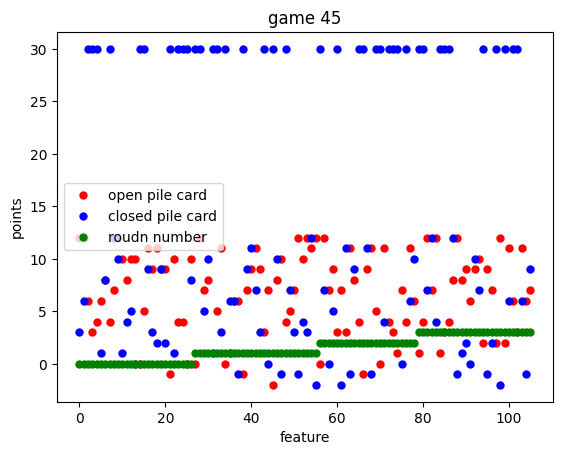

In [108]:
print(columns2[44])
plt.plot(range(106),a[1,:],'o',ms=5,color='red',label='open pile card') 
plt.plot(range(106),a[44,:],'o',ms=5,color='blue',label='closed pile card') 
plt.plot(range(106),a[51,:],'o',ms=5,color='green',label='roudn number') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("game 45")
plt.xlabel("feature")
plt.ylabel("points")

Seem to that create has some problem in games for sure, likely also rounds. 

Text(0, 0.5, 'points')

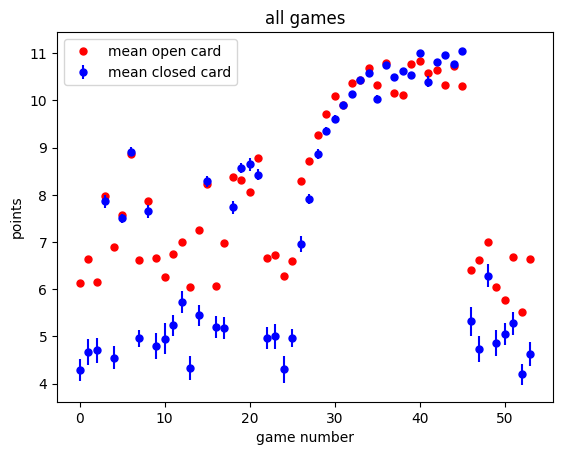

In [120]:
plt.plot(games_stat[0,:],games_stat[1,:],'o',ms=5,color='red',label='mean open card') 
plt.errorbar(games_stat[0,:],games_stat[2,:], yerr=games_stat[3,:],ms=5, fmt='o',color='blue',label='mean closed card')
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("all games")
plt.xlabel("game number")
plt.ylabel("points")

Forgotten global caused the piles to worsen. Looks now good. Closed should better be better than open because open gets the too bad cards of closed and deck. Average shoudl be 5.07 in closed deviation from it is likely just random. 

In [99]:
pile_closed=Pile('create_closed',False)
print(pile_closed)

Pile has length of 150 Cards and is closed. Its position is at [20, 10]


Text(0, 0.5, 'points')

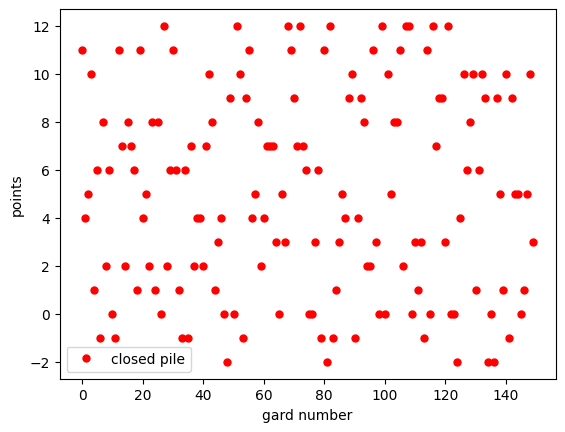

In [105]:
res=np.zeros((2,150))
for i in range(150):
    res[0,i]=i
    res[1,i]=pile_closed.list_cards[i].number
plt.plot(res[0,:],res[1,:],'o',ms=5,color='red',label='closed pile') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("")
plt.xlabel("card number")
plt.ylabel("points")

In [121]:
print(a[44,:])

[ 3.  6. 30. 30. 30.  1.  8. 30. 12. 10.  1.  4.  5.  0. 30. 30.  9.  3.
  2.  9.  2. 30.  1. 30. 30. 30.  8. 30. 30.  5. 10. 30. 30.  3. 30.  6.
  6. -1. 30.  9. 11.  7.  3. 30.  0. 30. 10. -1. 30.  7.  3. -1.  4.  3.
 12. -2. 30.  7.  0.  5. 30. -2. 11. -1.  9. 30. 30. 11. -1. 30. 30.  4.
 30. 30. 30.  0. 30.  6. 10. 30. 30.  7. 12.  4. 30. 30. 30. 12. -1.  1.
  2.  0. 10.  7. 30. -1.  2. 30. -2. 30.  6. 30. 30.  6. -1.  9.]
